# Exploratory Data Analysis House Prices dataset

The objective of this analysis is to understand the House Prices dataset in order to predict sales prices.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns

In [2]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
data=pd.concat([train,test], ignore_index=True, axis=0)

## Section 1: Basic Data Exploration

In this section we do a first exploration of our data in order to delete features that we won't use.

In [3]:
display(data.head(5))
print(data.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


(2919, 81)


In [4]:
# Drop columns with many nulls
for col in data.columns:
    if len(data[col].dropna())<2300 and col!='SalePrice':
        data=data.drop([col],axis=1)
# Delete Id since it doesn't add meaningful information
data=data.drop(['Id'],axis=1)

In [5]:
for col in data.columns:
    uniques=len(data[col].unique())
    # If it has less than 7 values we can consider it a category and if it's between 8 and 100
    if uniques<=7:
        data[col]=data[col].astype('category')
        print('Changing variable',col,'to categorical.','It has',uniques,'distinct values')
    # The columns of type object which are not considered category should be deleted
    elif str(data[col].dtype)=="object":
        data=data.drop([col],axis=1)
        print('Deleting column',col)

Changing variable MSZoning to categorical. It has 6 distinct values
Changing variable Street to categorical. It has 2 distinct values
Changing variable LotShape to categorical. It has 4 distinct values
Changing variable LandContour to categorical. It has 4 distinct values
Changing variable Utilities to categorical. It has 3 distinct values
Changing variable LotConfig to categorical. It has 5 distinct values
Changing variable LandSlope to categorical. It has 3 distinct values
Deleting column Neighborhood
Deleting column Condition1
Deleting column Condition2
Changing variable BldgType to categorical. It has 5 distinct values
Deleting column HouseStyle
Changing variable RoofStyle to categorical. It has 6 distinct values
Deleting column RoofMatl
Deleting column Exterior1st
Deleting column Exterior2nd
Changing variable MasVnrType to categorical. It has 5 distinct values
Changing variable ExterQual to categorical. It has 4 distinct values
Changing variable ExterCond to categorical. It has 5 

## Section 2: Identifying main variables related to 'SalePrice'

The objective of this section is to understand which features are meaningful to predict 'SalePrice'

From the numerical variables we identify that 

From categorical variables 

In [6]:
# Define the target column
target_variable = ["SalePrice"]
# Define the numerical variables
num_variables = [column for column, datatype in data.dtypes.items() if datatype in (np.int64, np.float64) and column!="SalePrice"]
# Define the categorical ones
categorical_variables = [column for column in data.columns if column not in target_variable + num_variables]
print(num_variables)
print(categorical_variables)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'YrSold', 'SaleCondition']


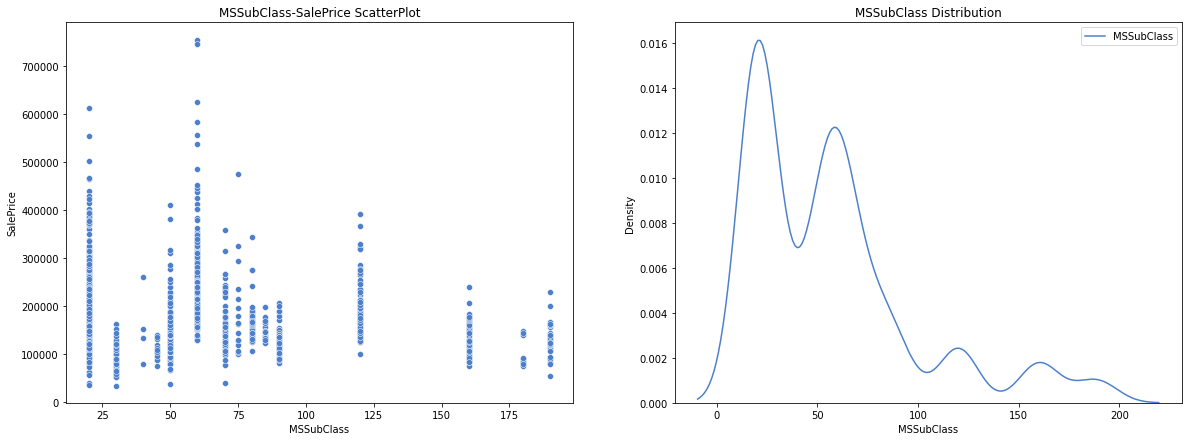

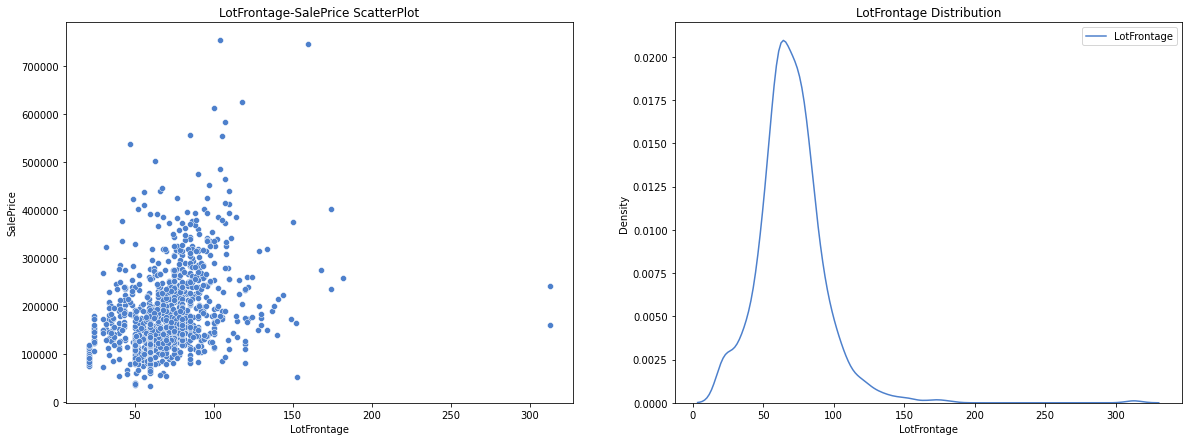

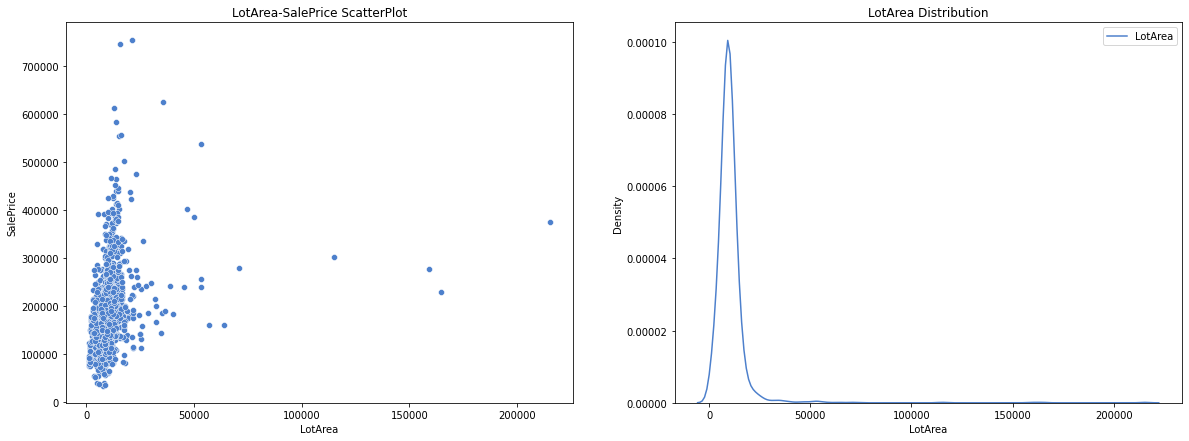

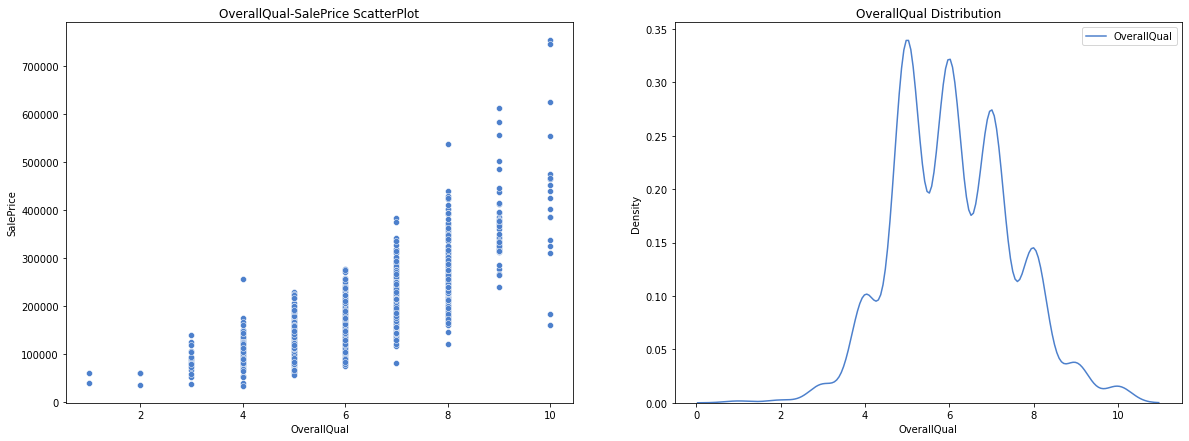

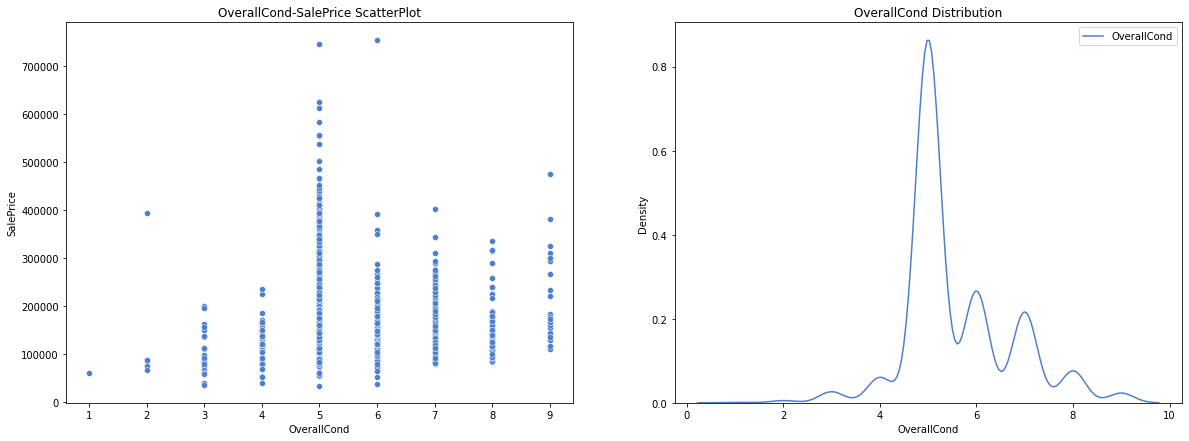

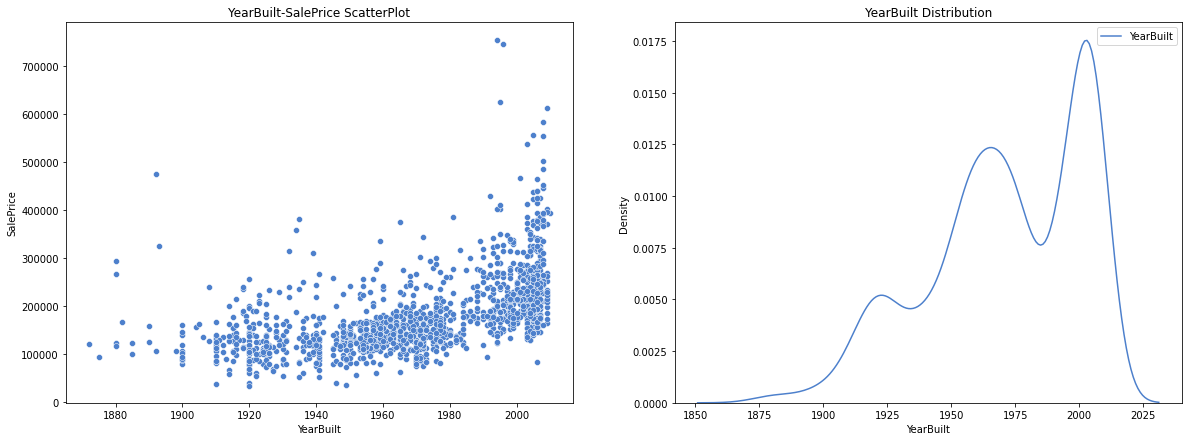

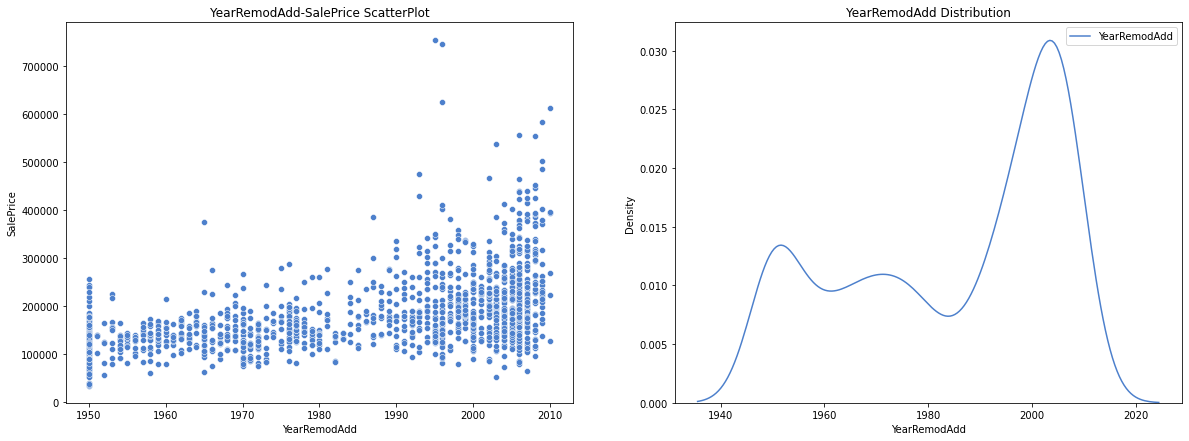

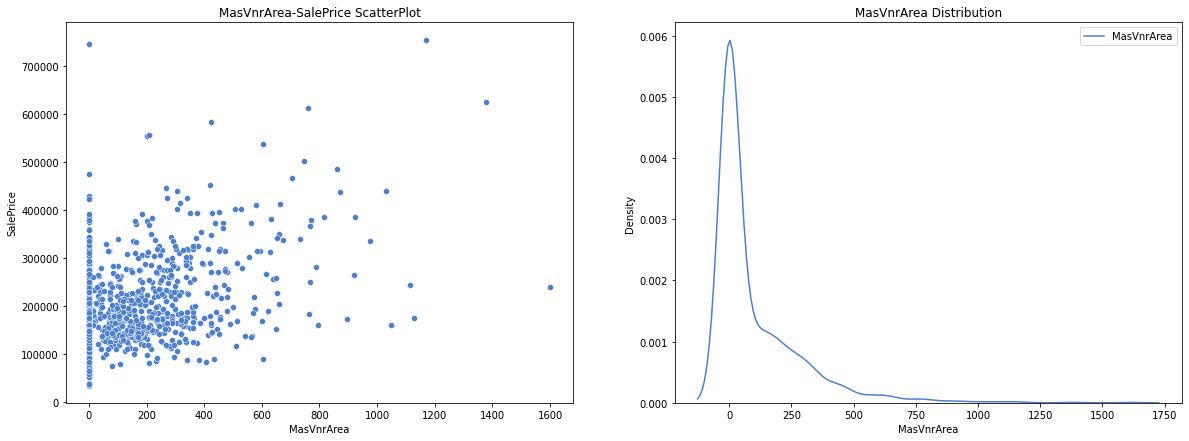

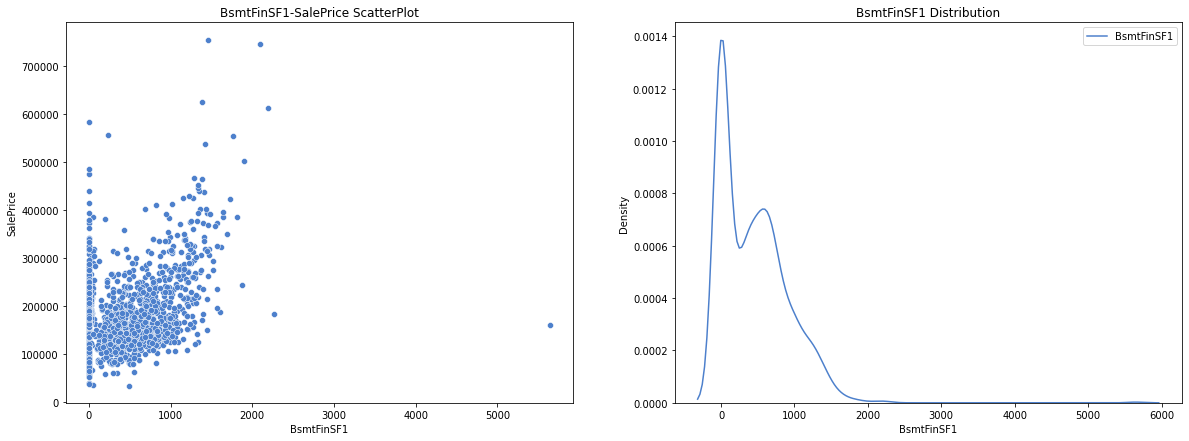

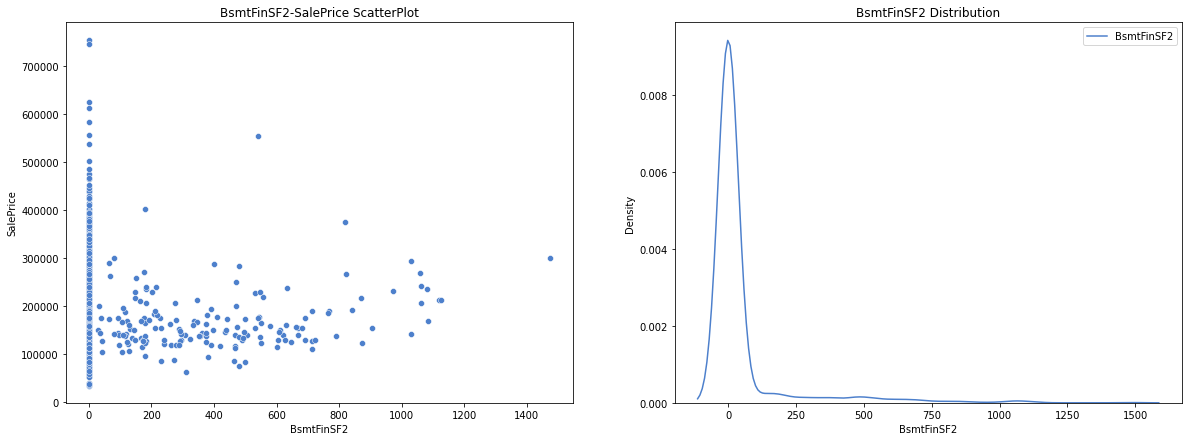

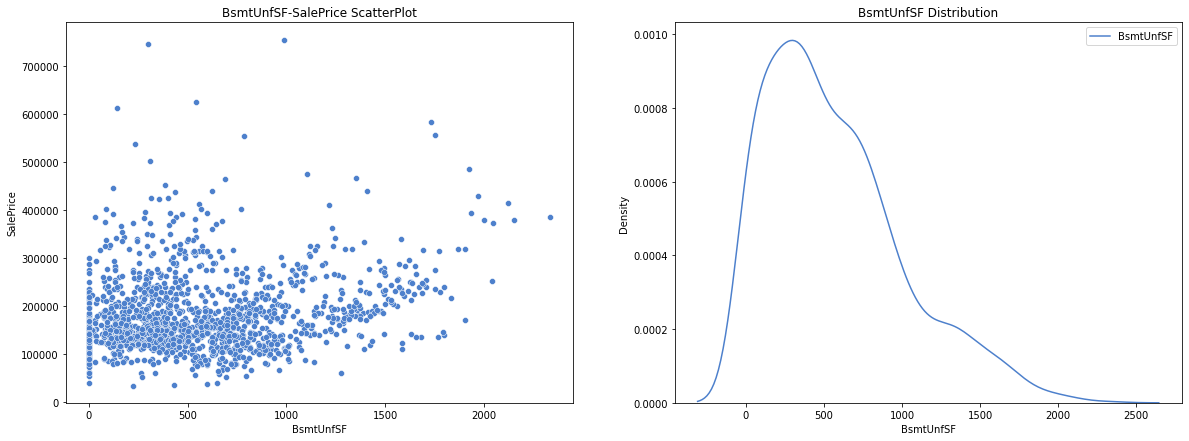

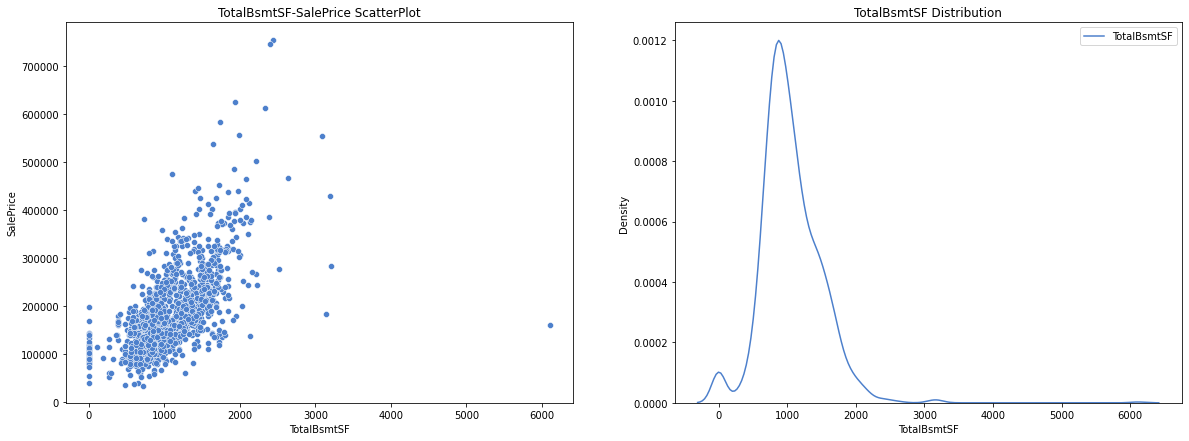

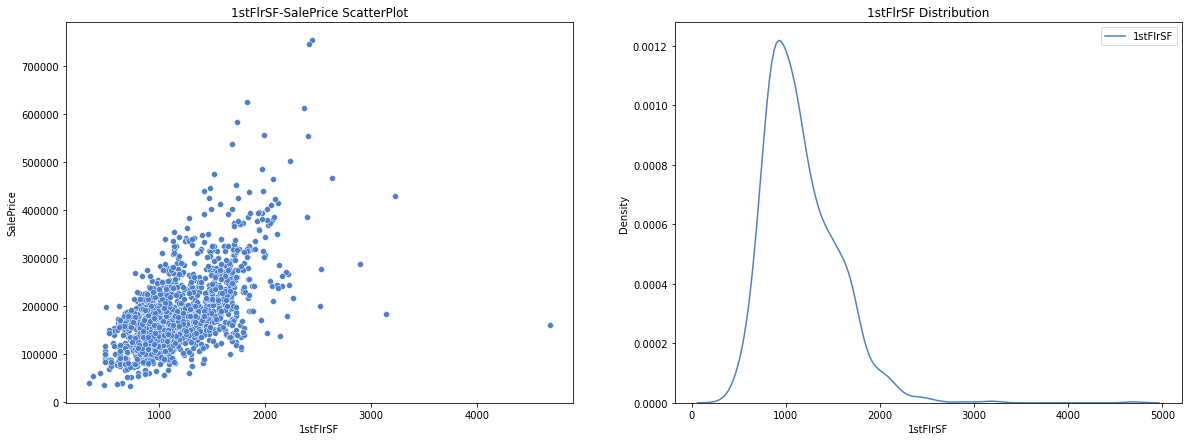

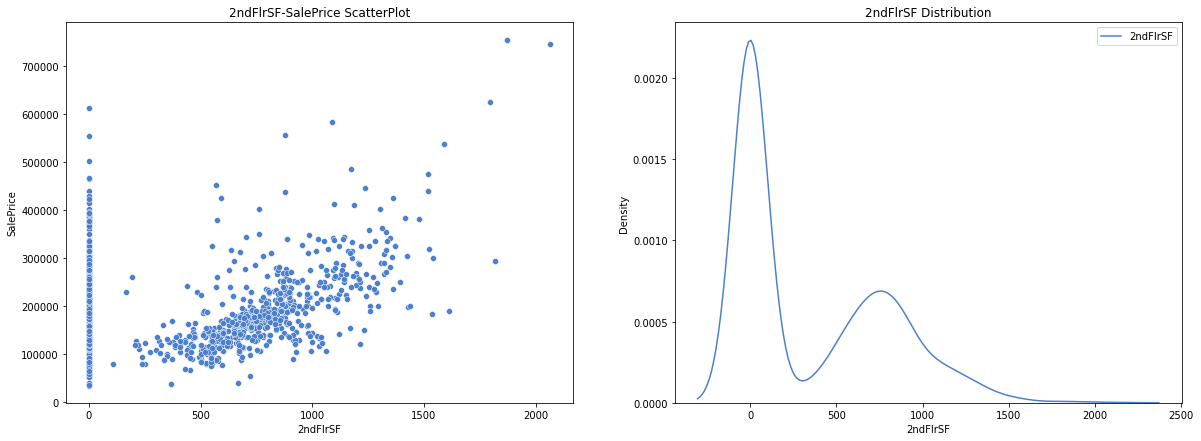

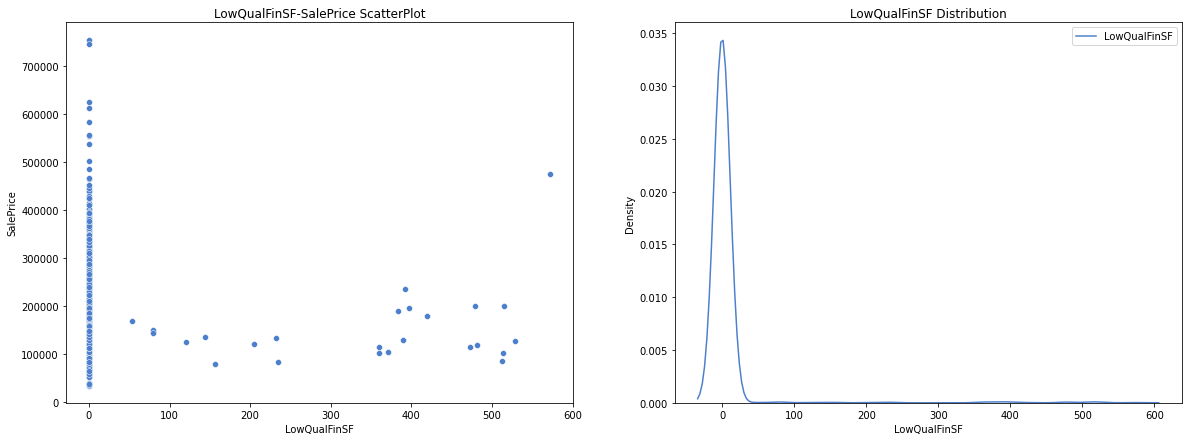

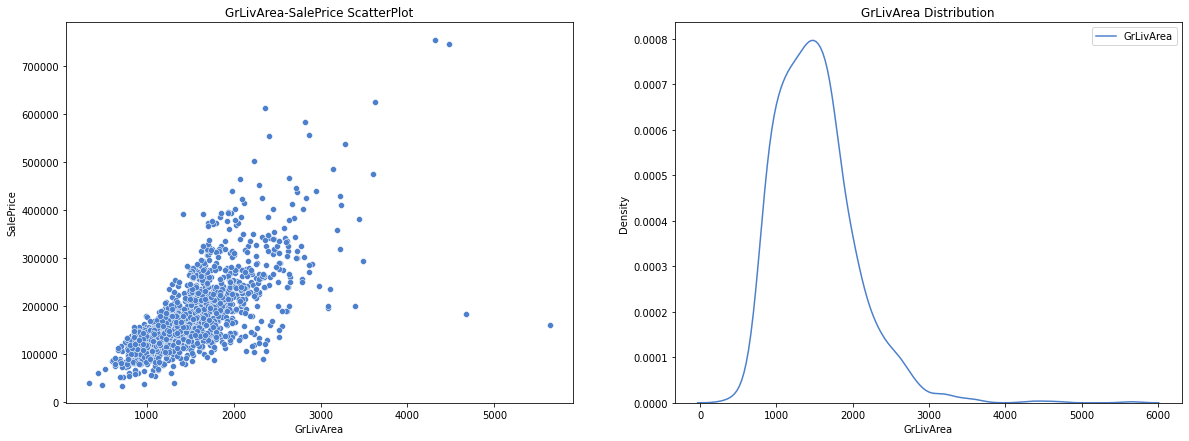

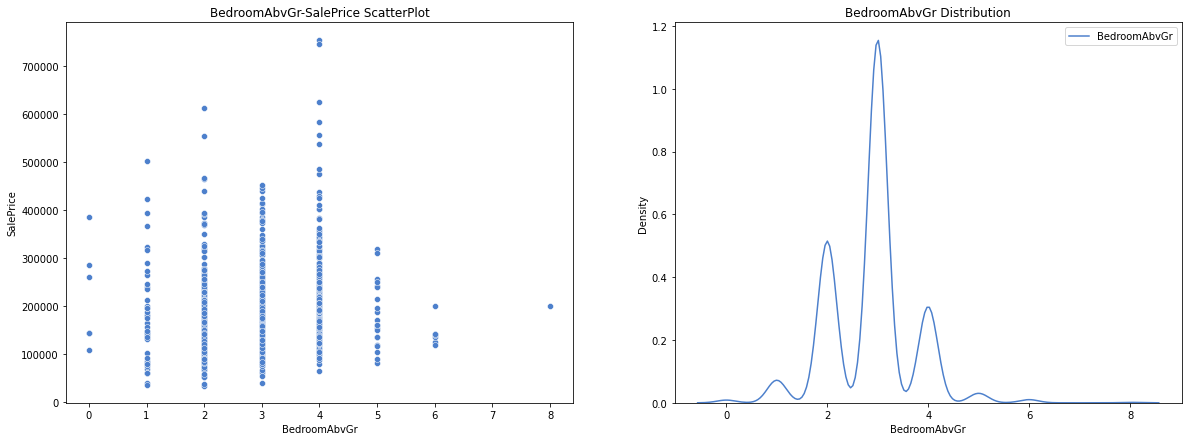

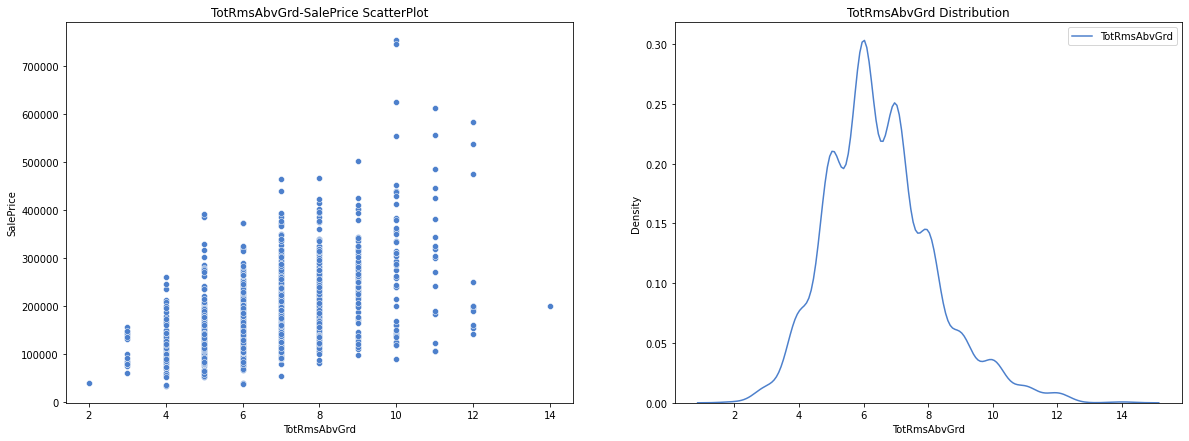

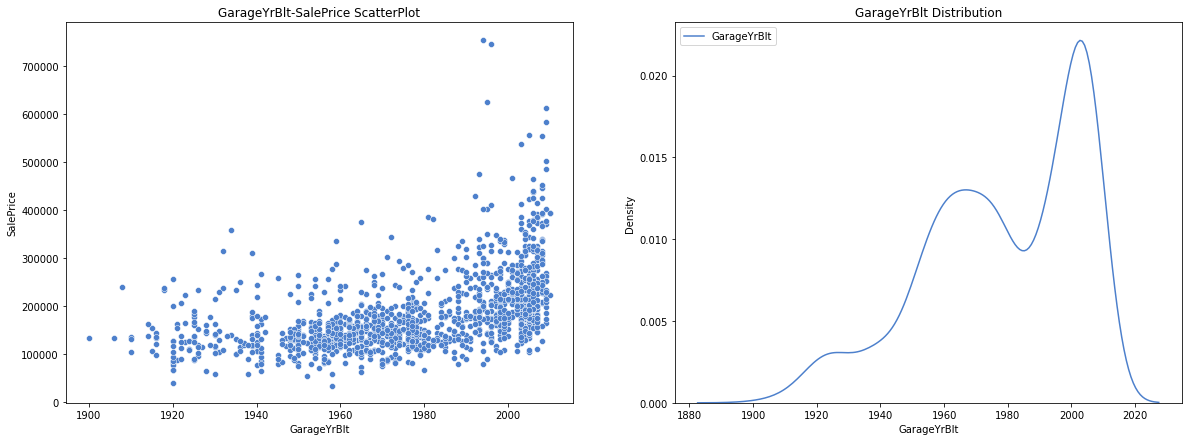

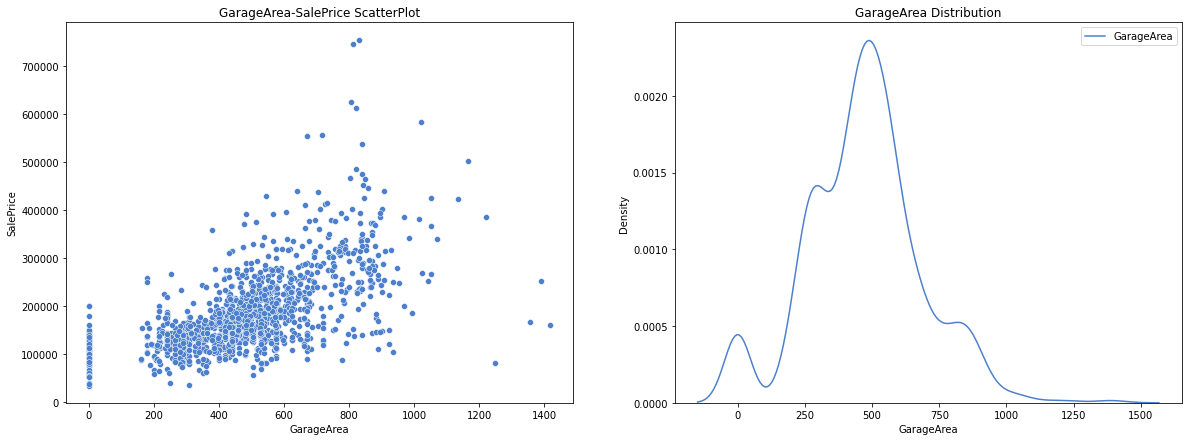

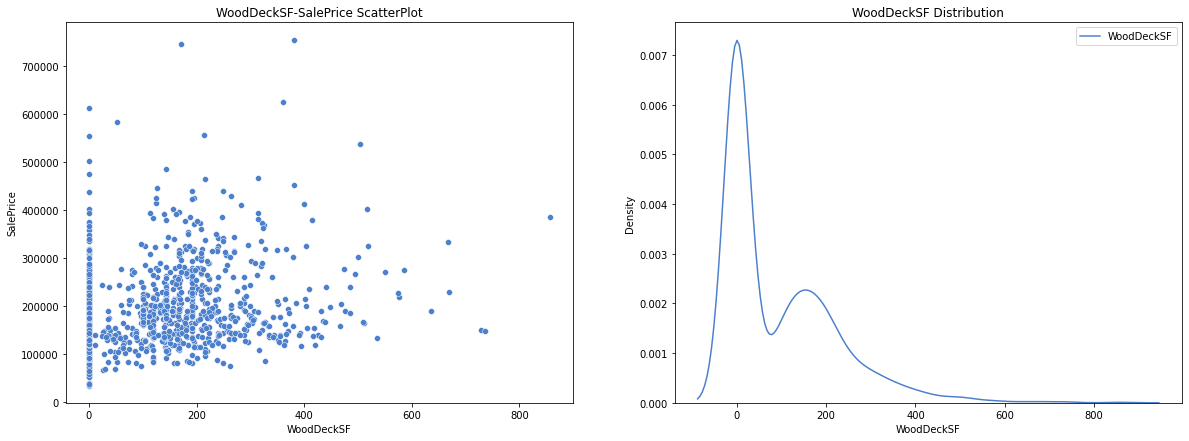

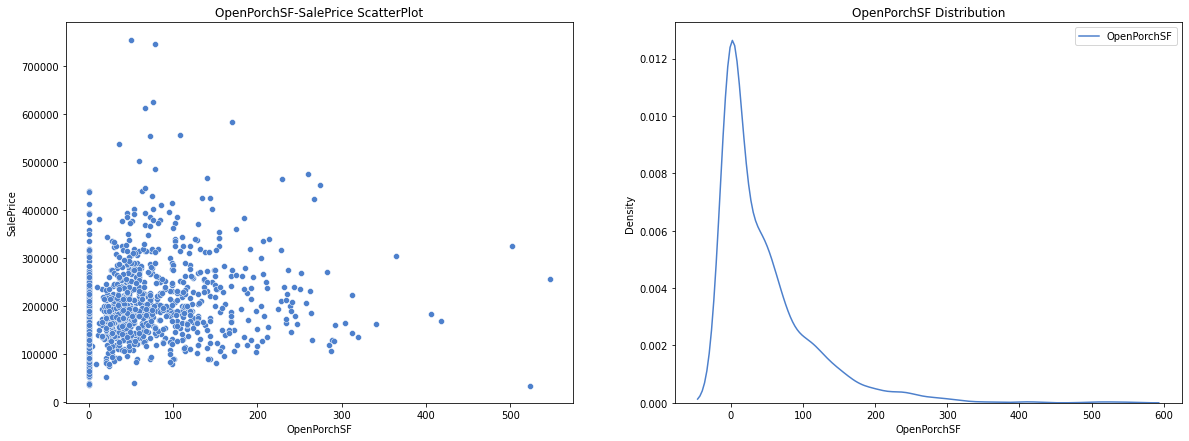

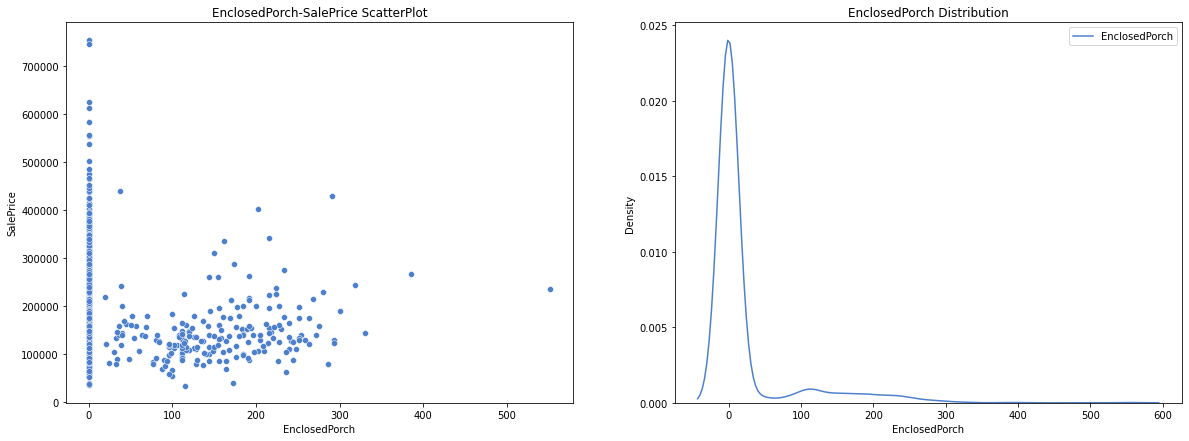

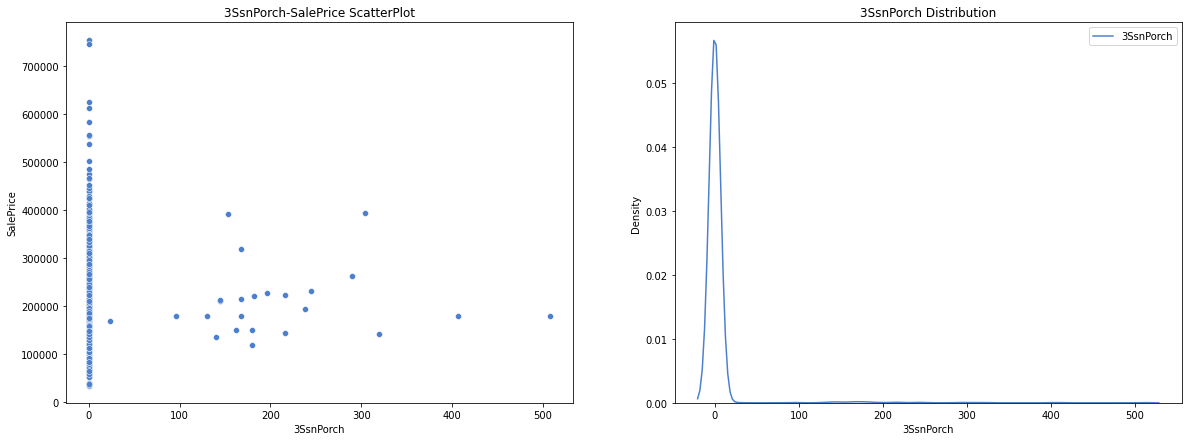

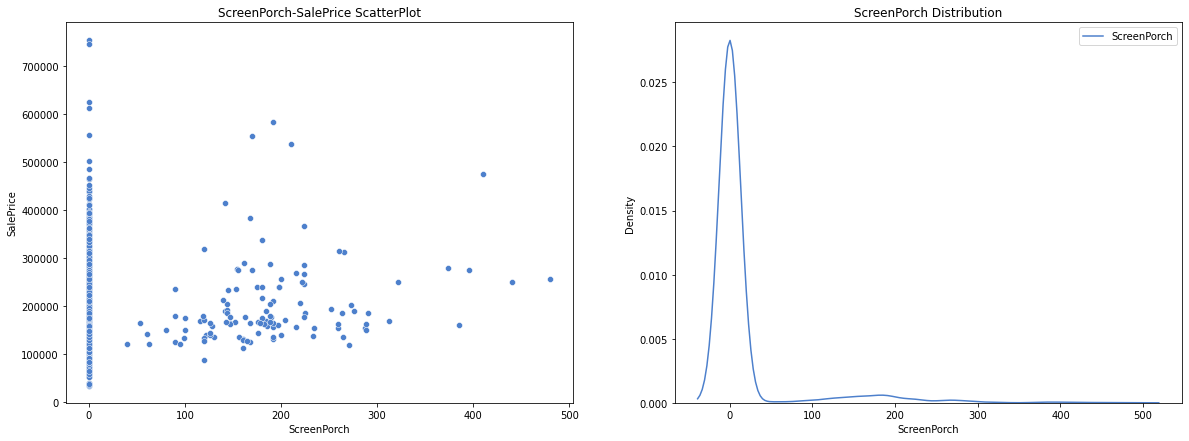

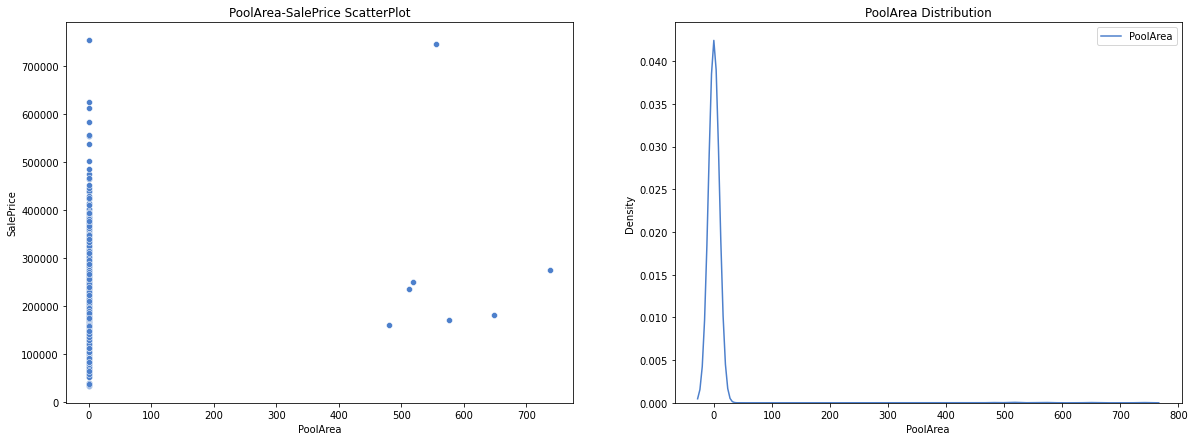

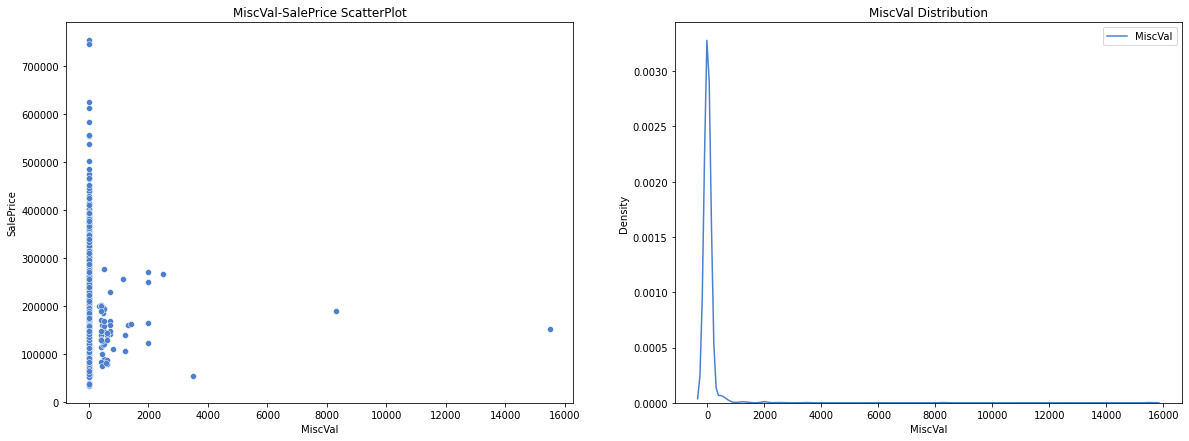

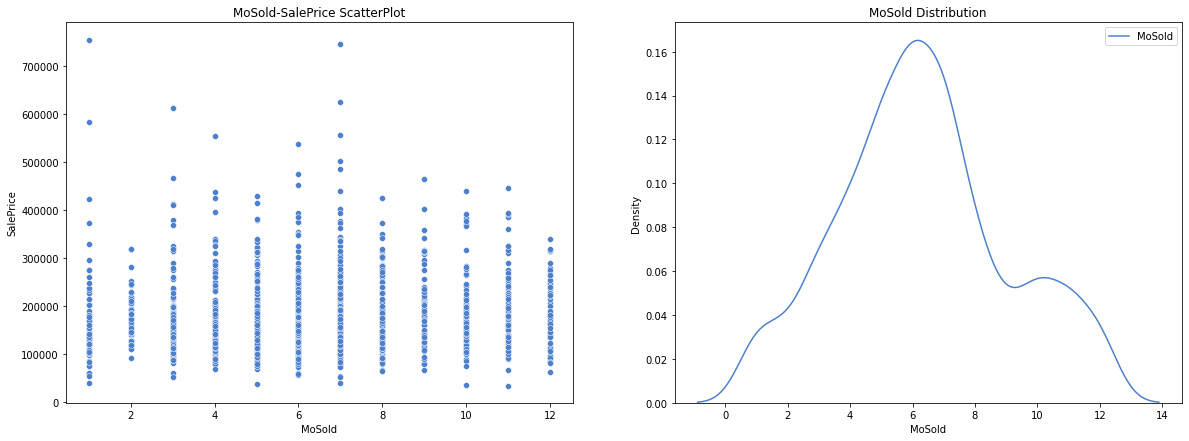

In [7]:
# Understanding numerical variables
for col in num_variables:
    col_df=data.dropna(subset=["SalePrice",col])
    plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    plt.title(col+'-SalePrice ScatterPlot')
    sns.scatterplot(x=col,y='SalePrice',data=col_df,color=(0.3,0.5,0.8))
    plt.subplot(1,2,2)
    plt.title(col+' Distribution')
    a=sns.kdeplot(col_df[col],color=(0.3,0.5,0.8),label=col)
    plt.legend()
    plt.show()

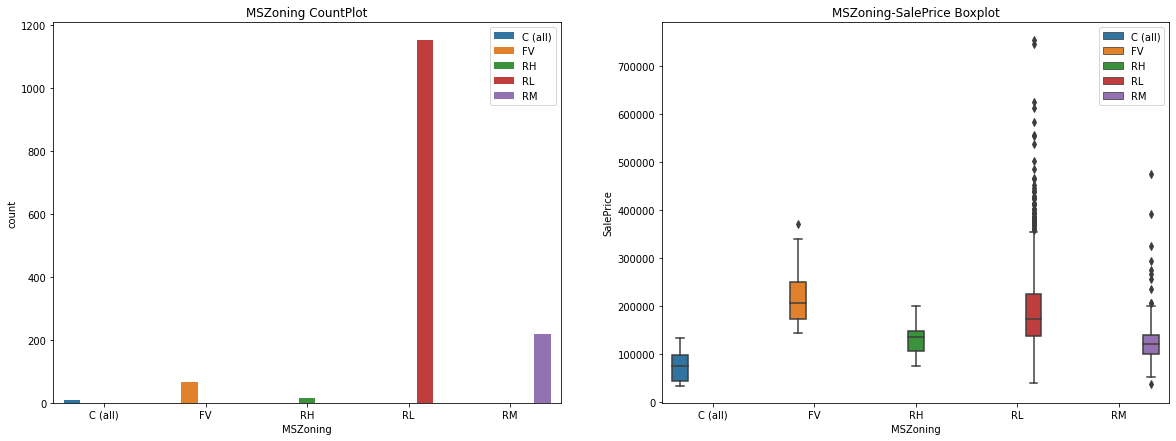

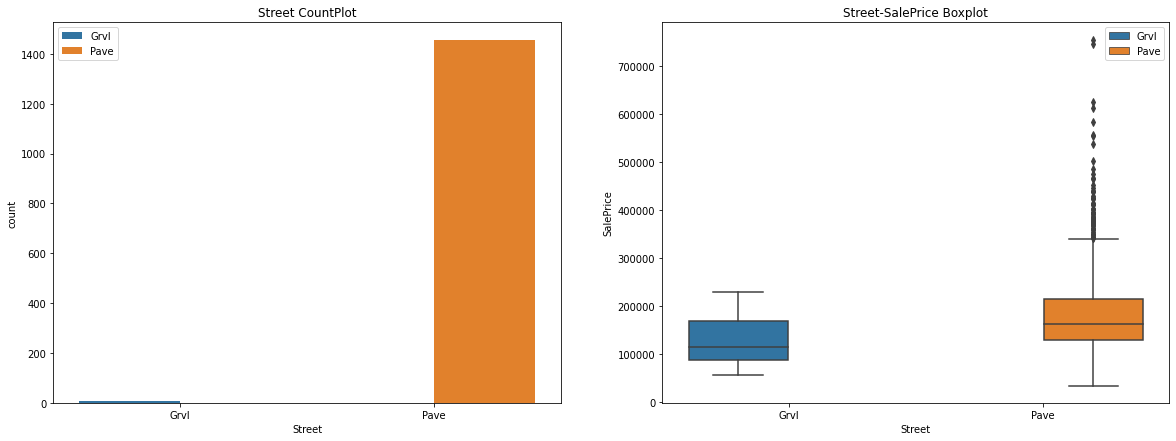

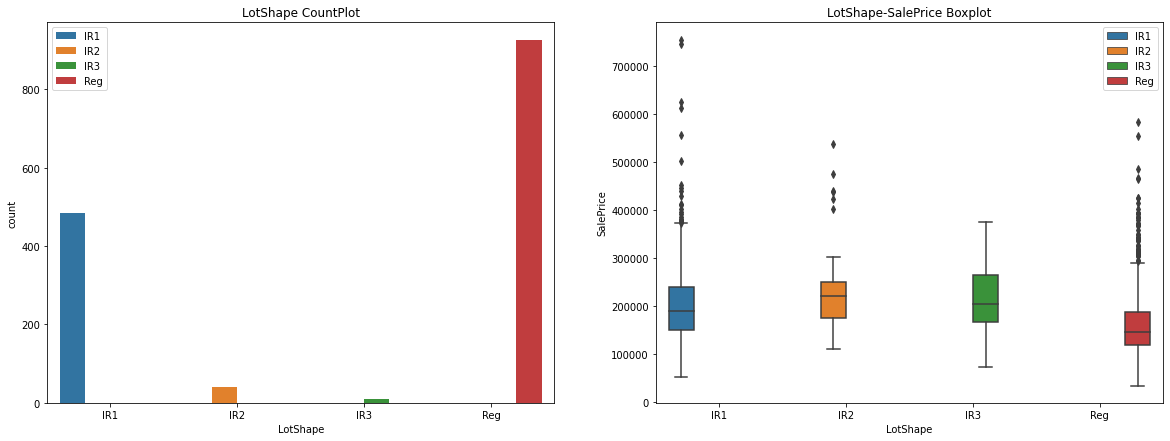

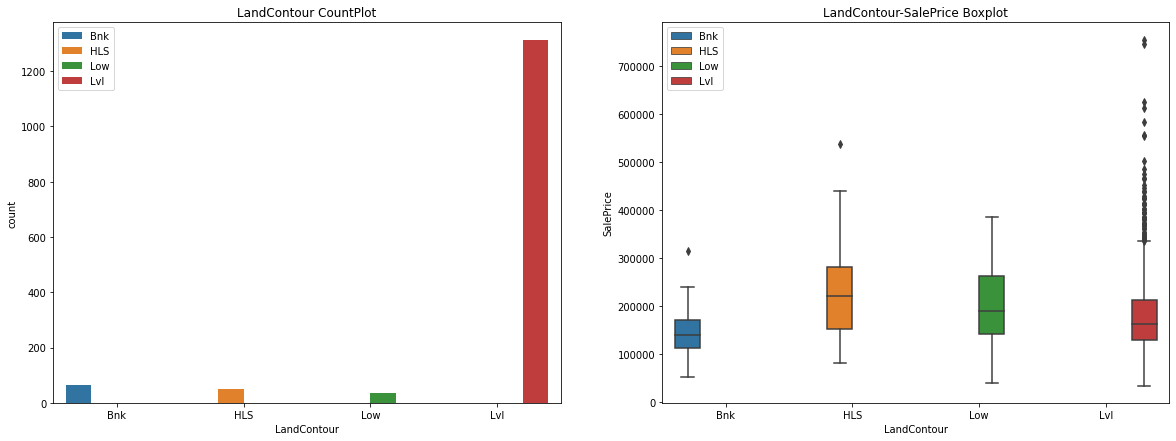

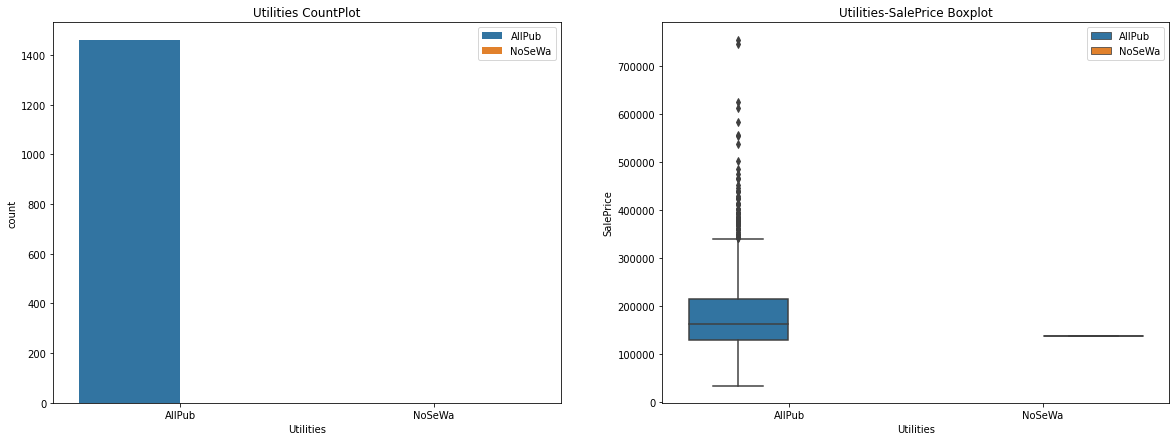

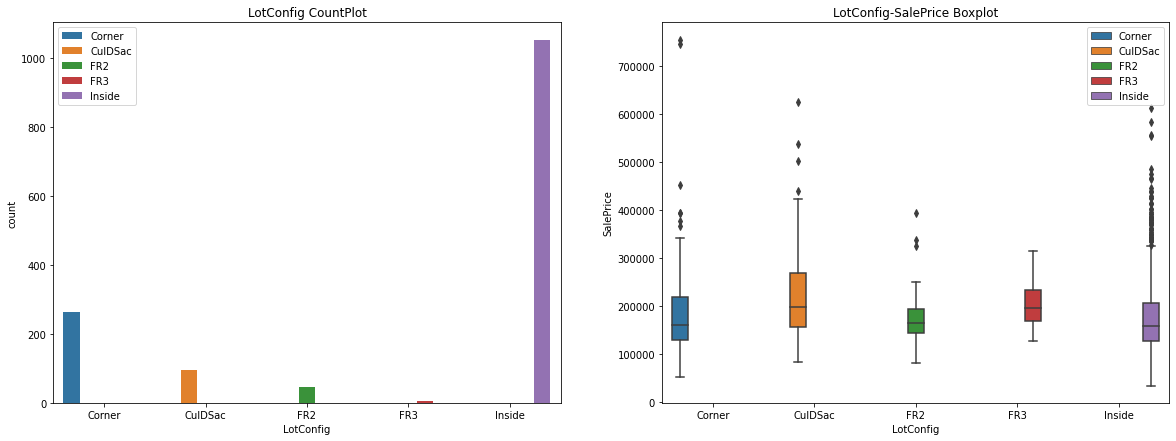

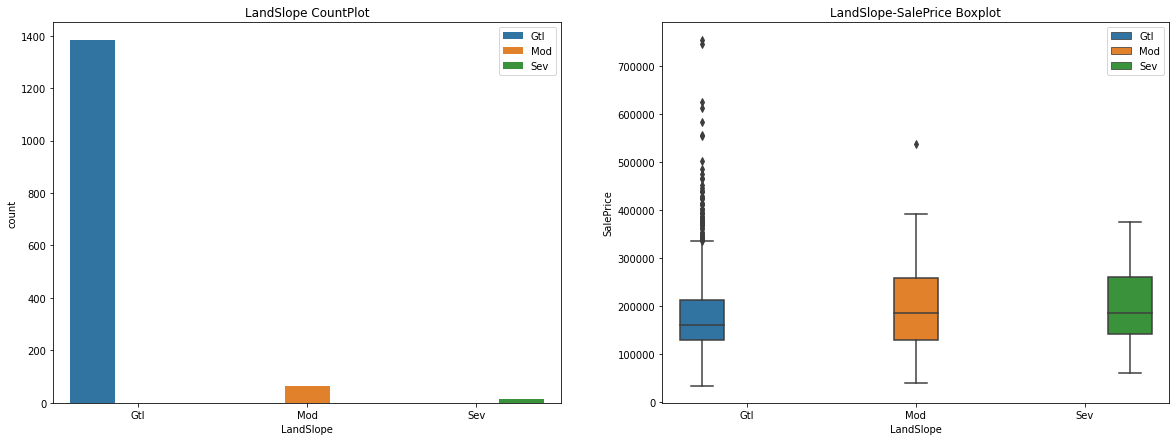

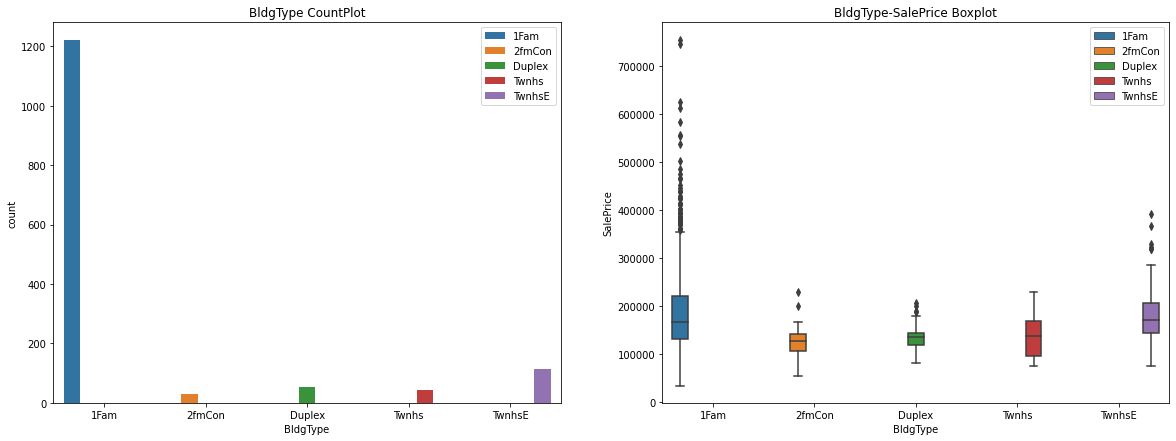

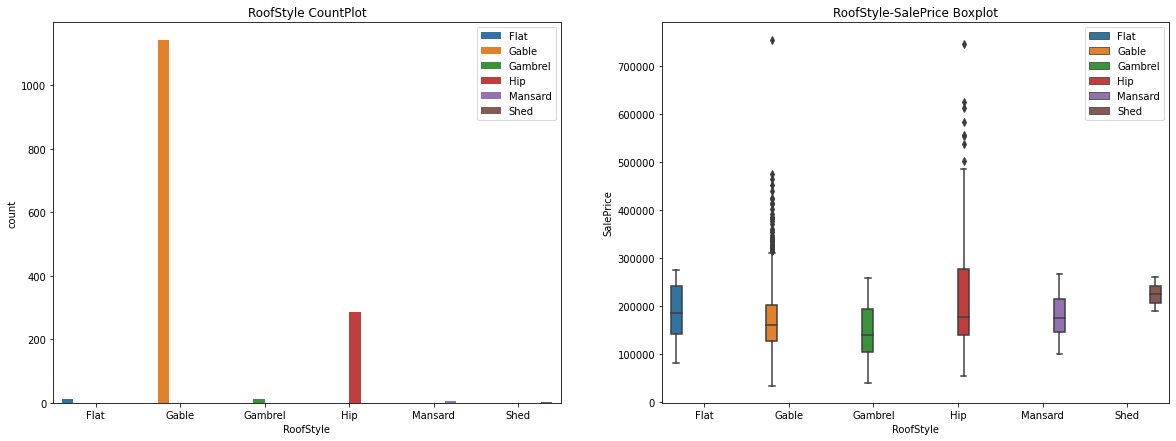

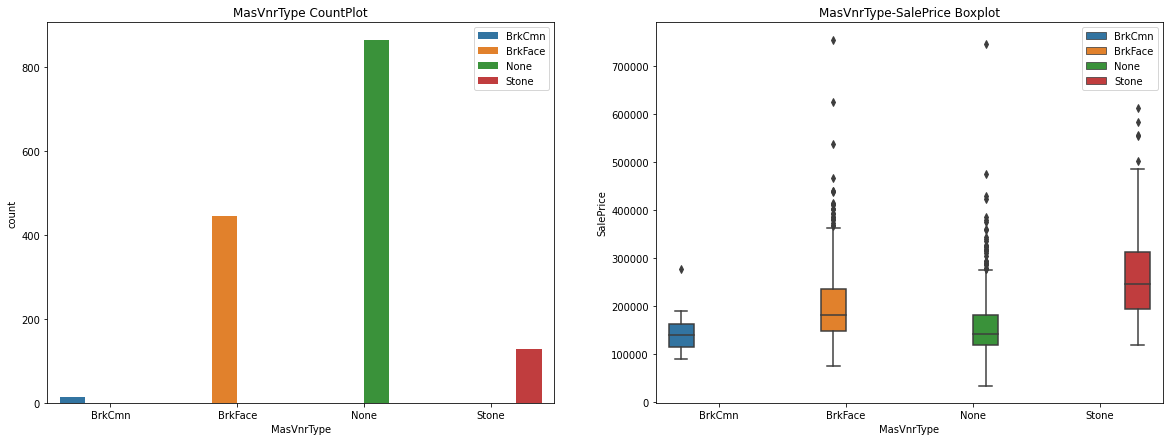

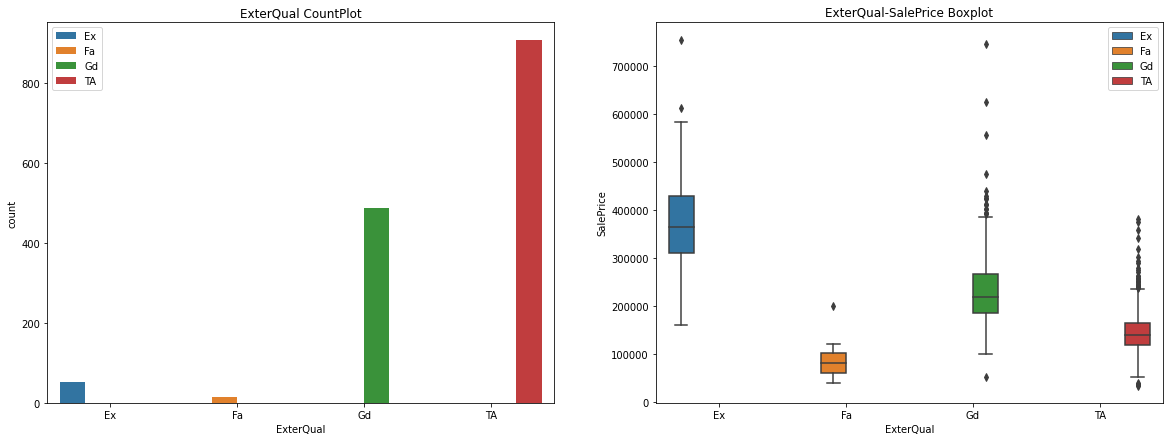

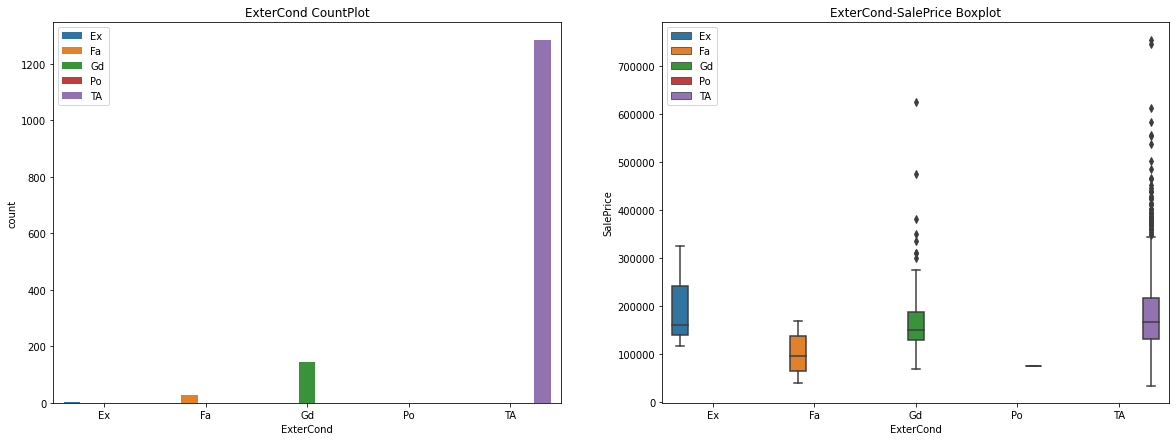

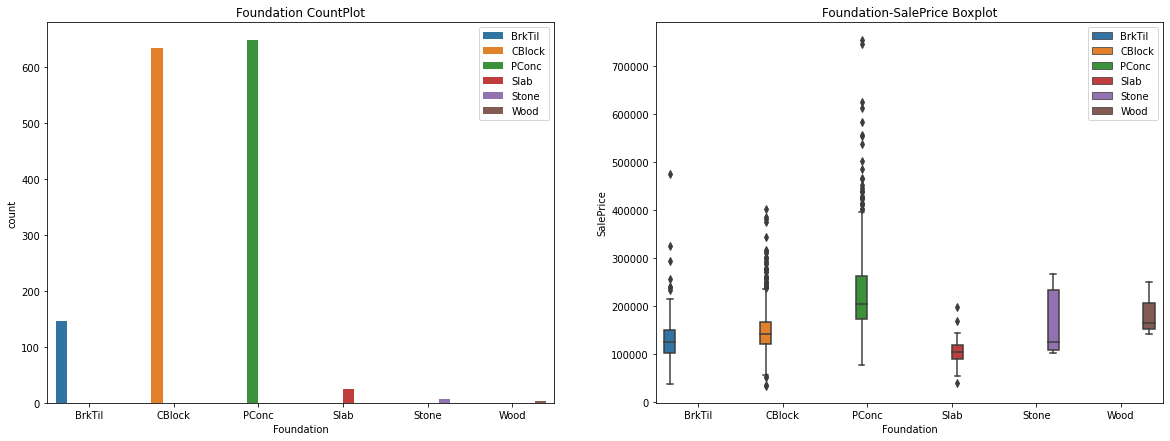

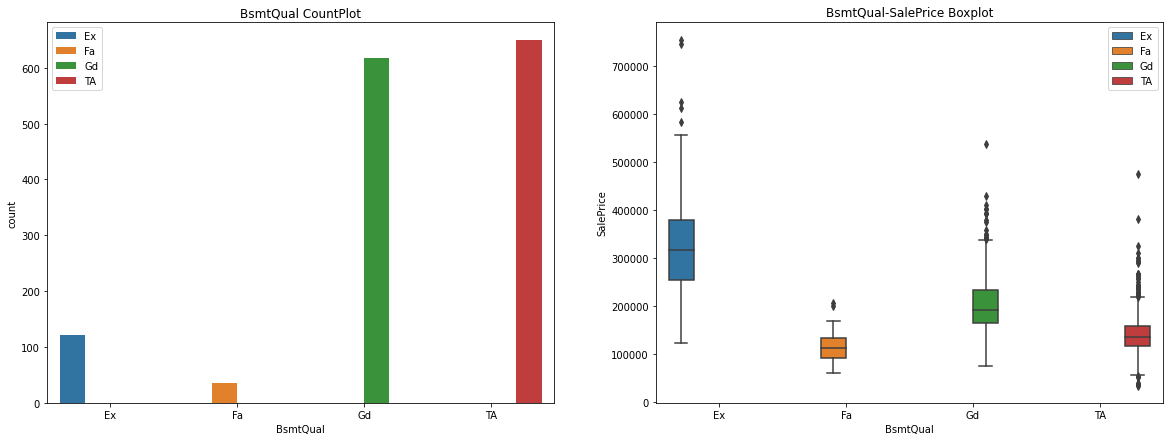

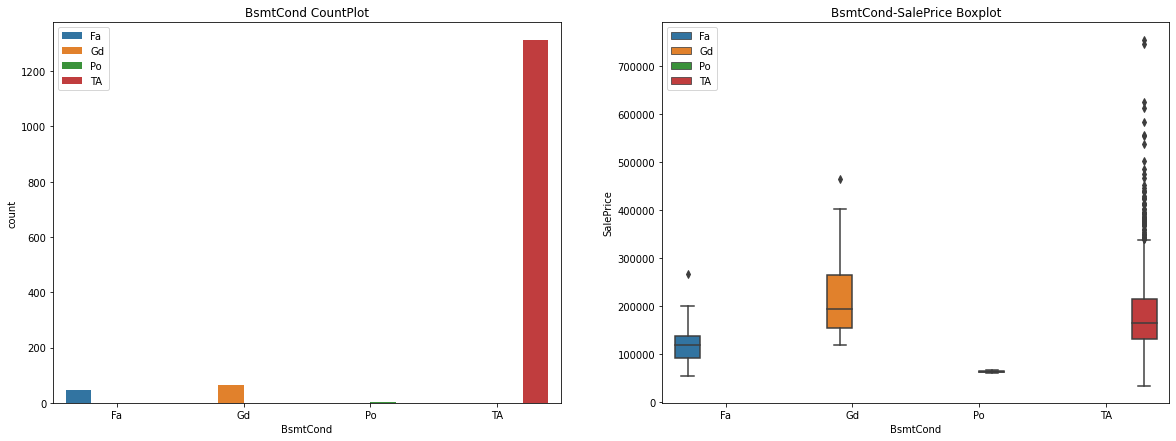

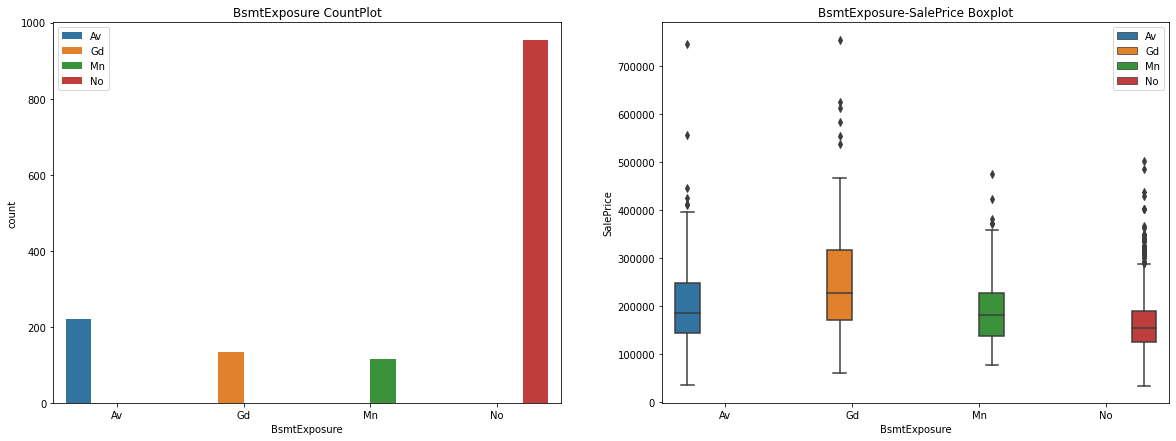

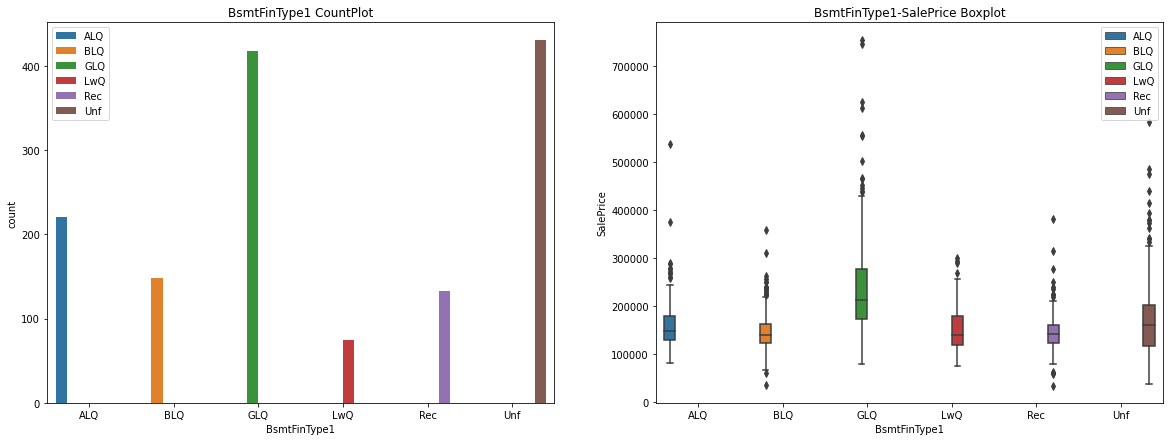

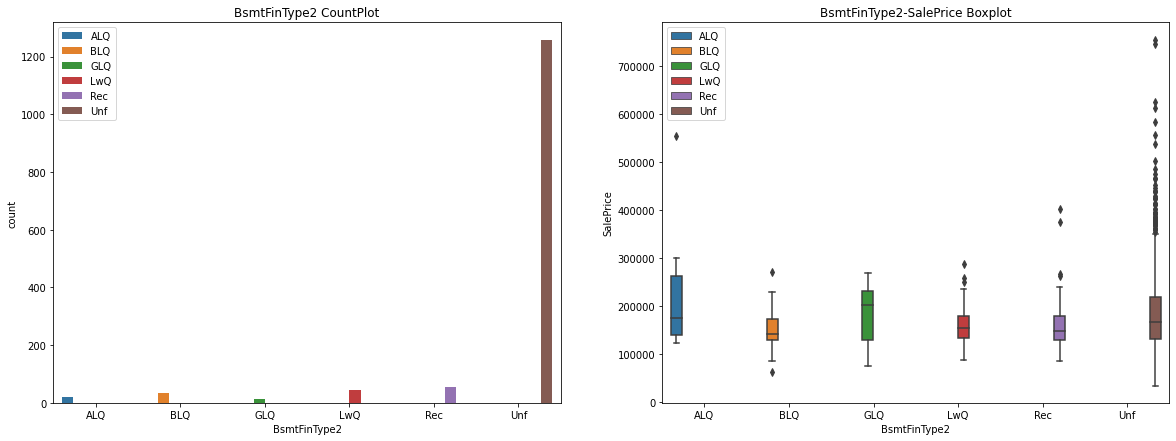

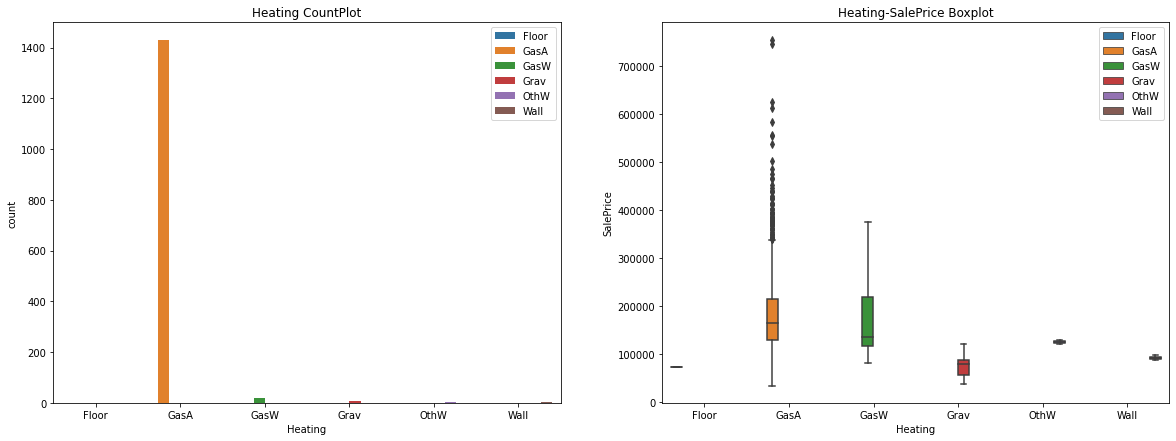

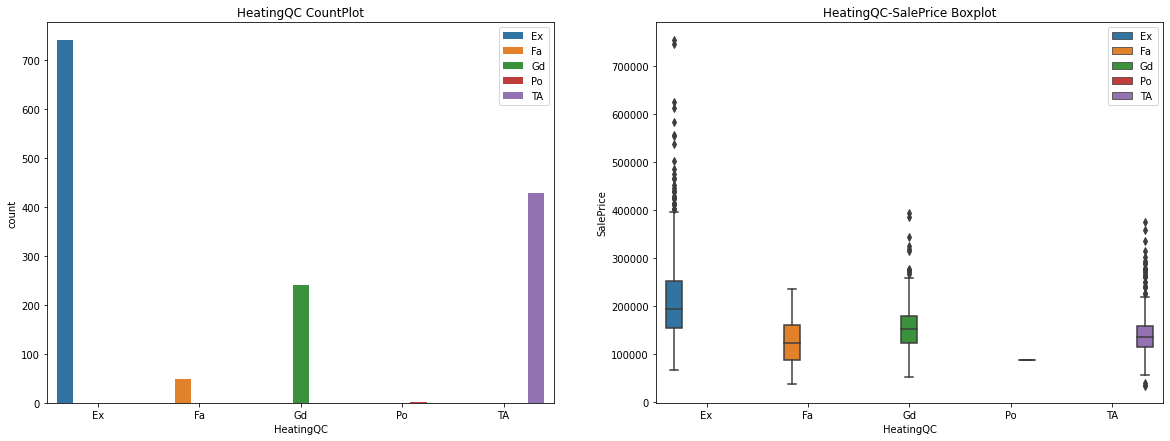

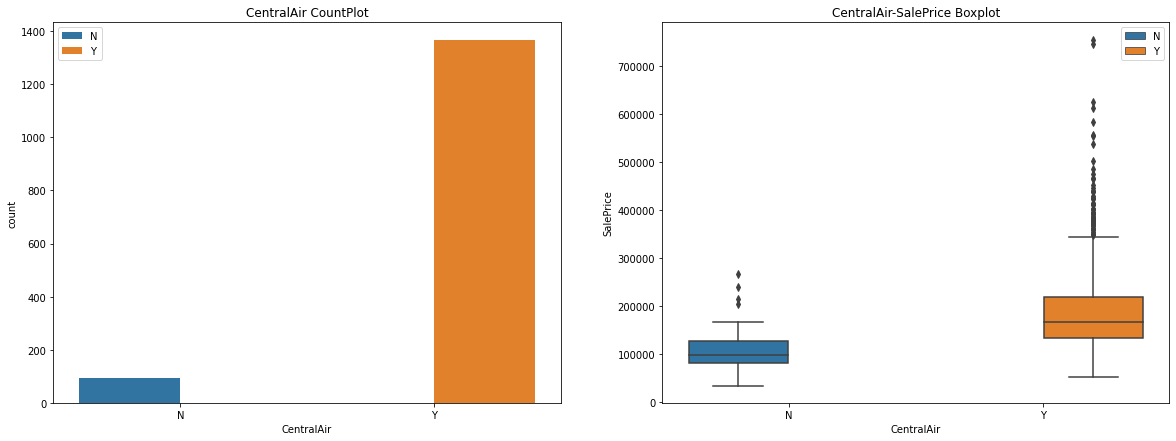

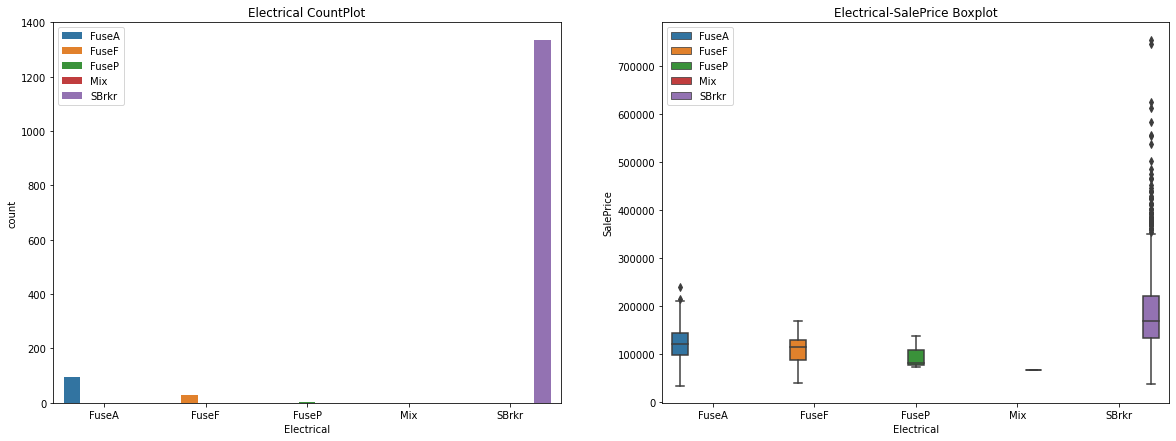

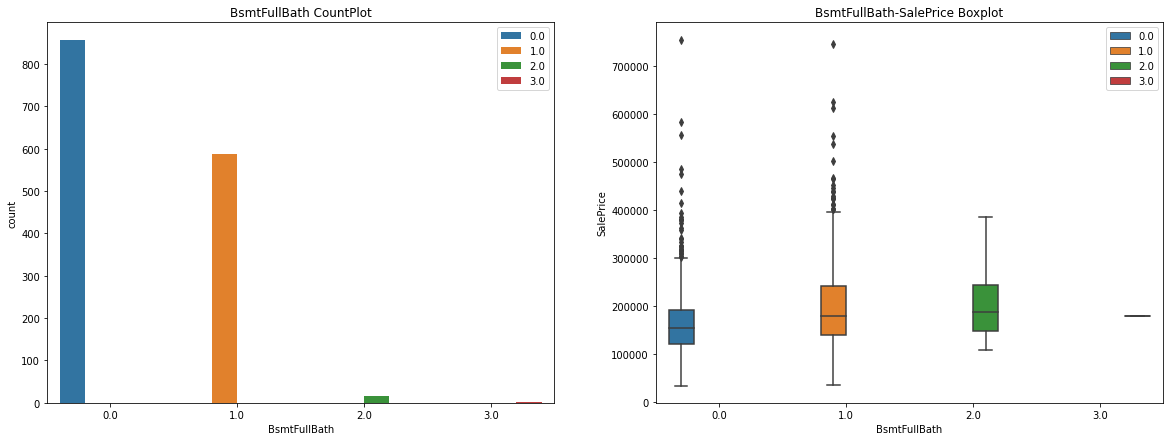

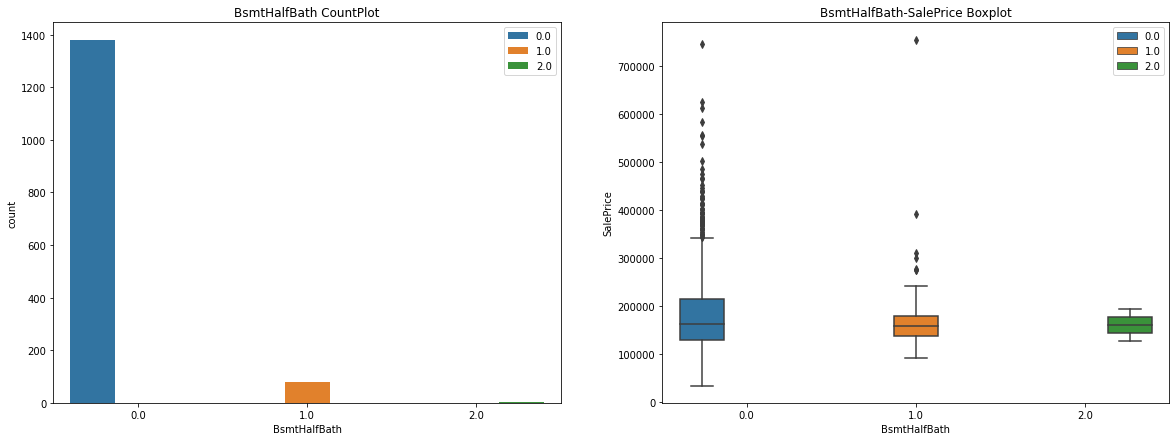

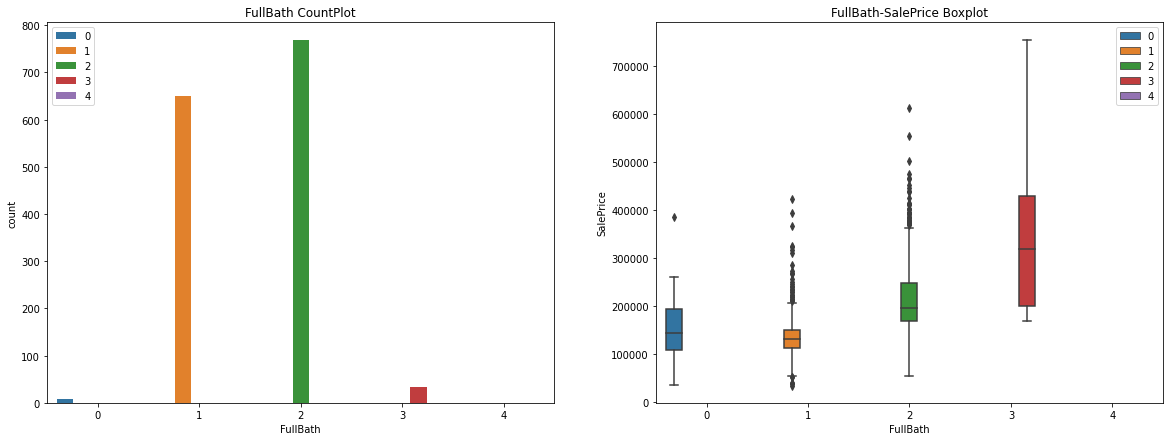

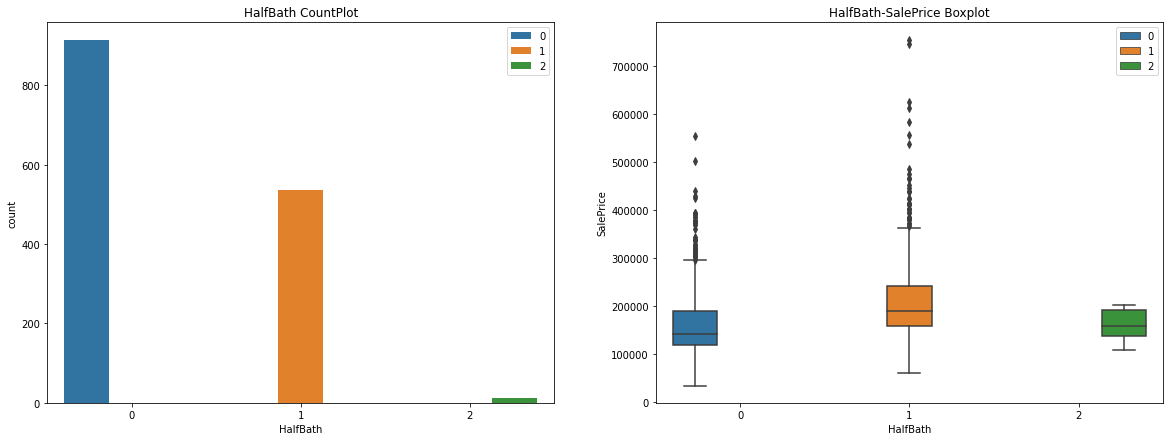

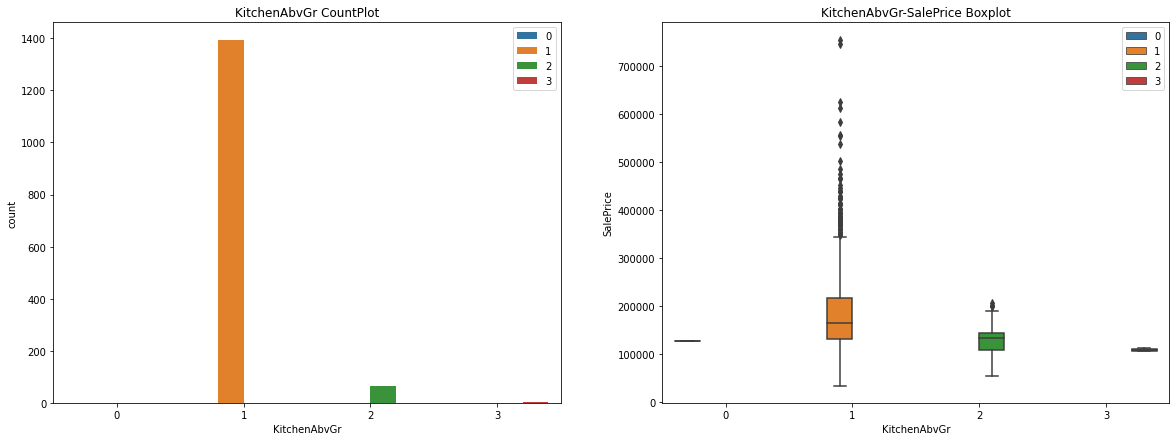

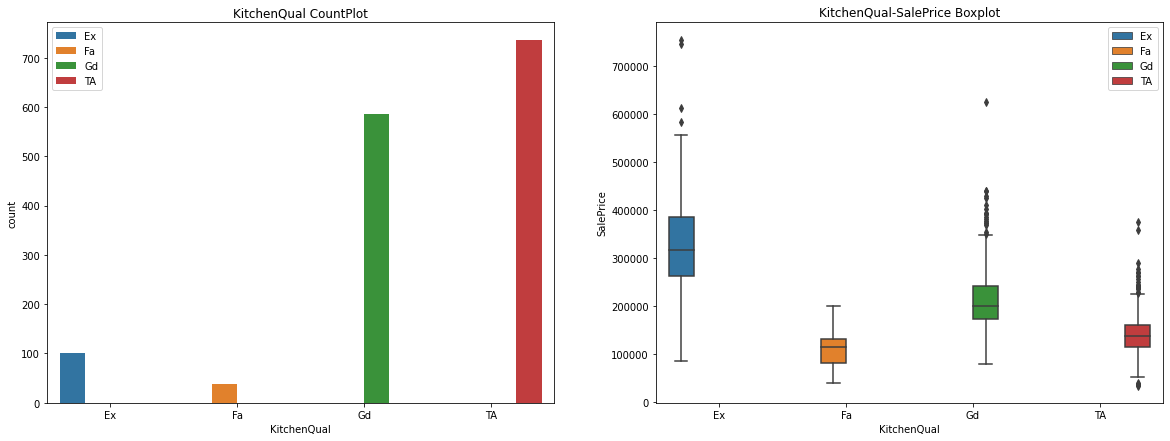

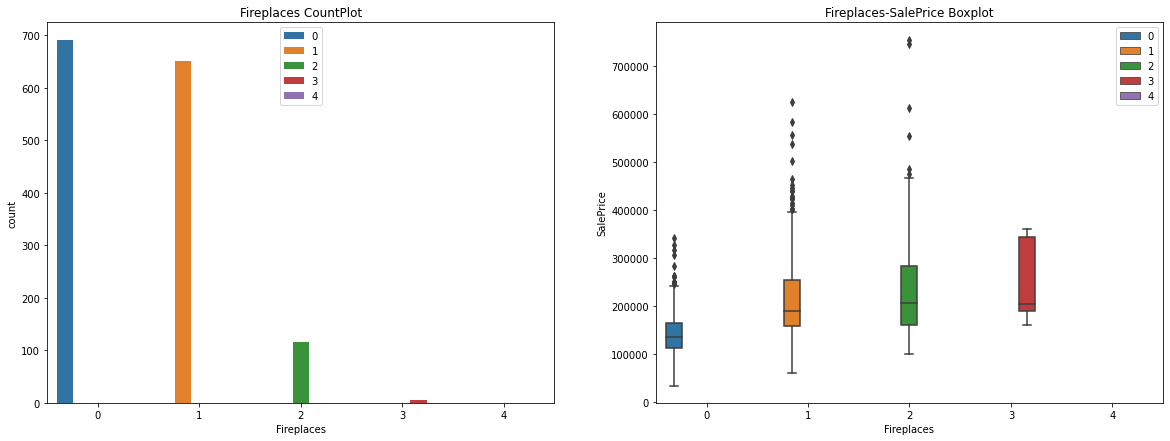

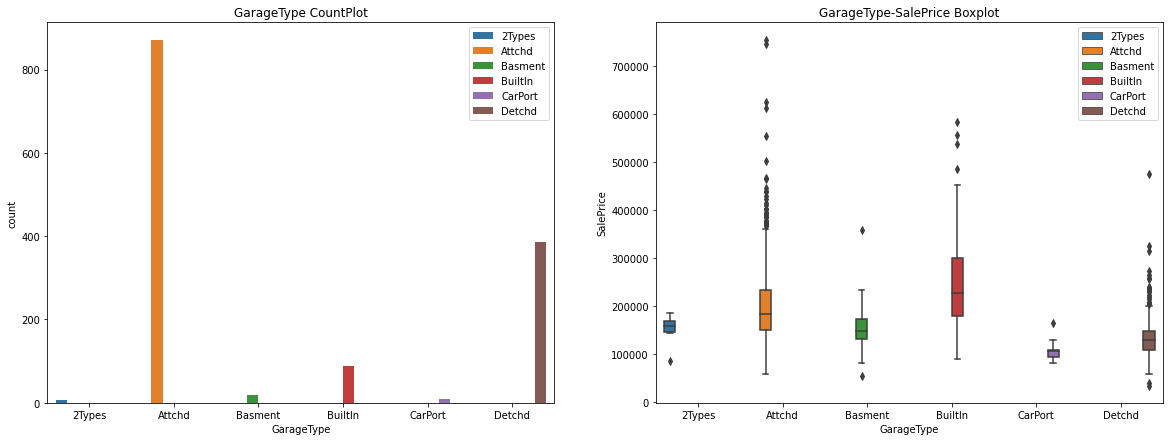

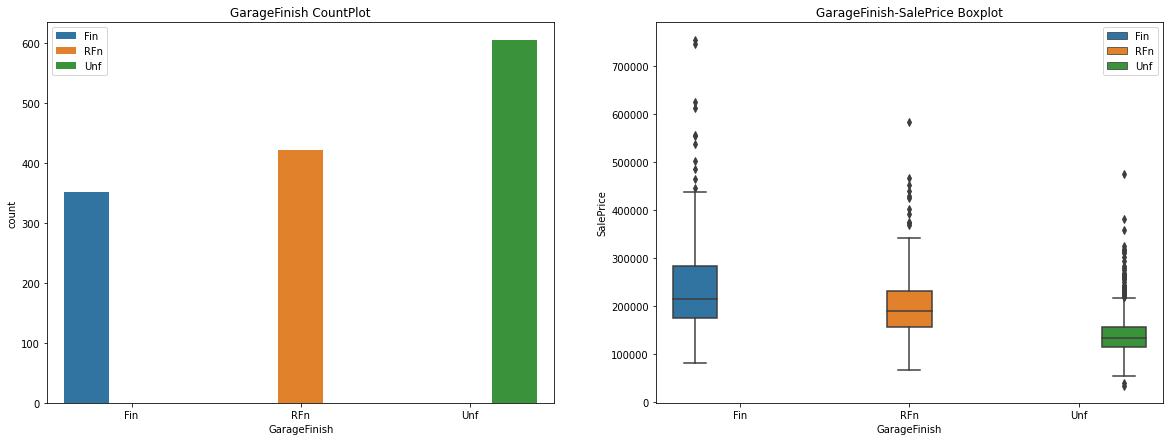

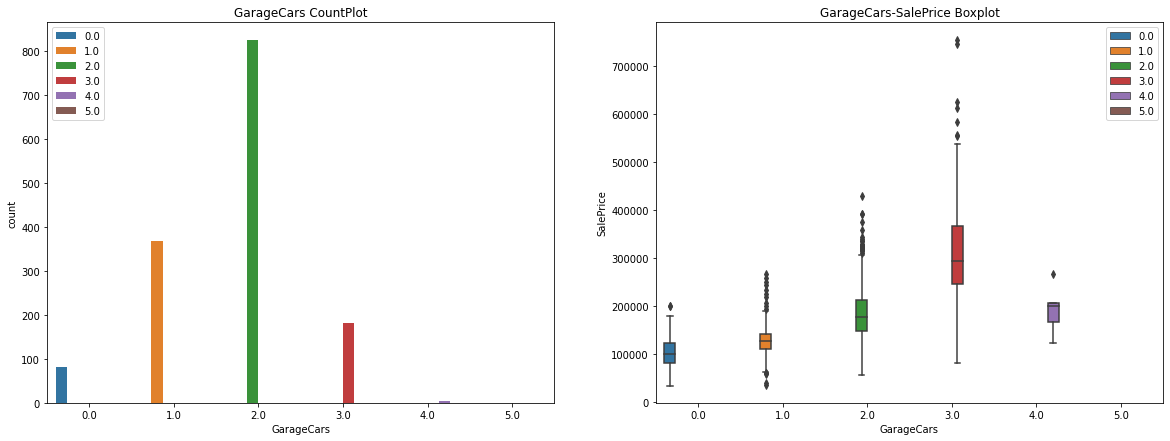

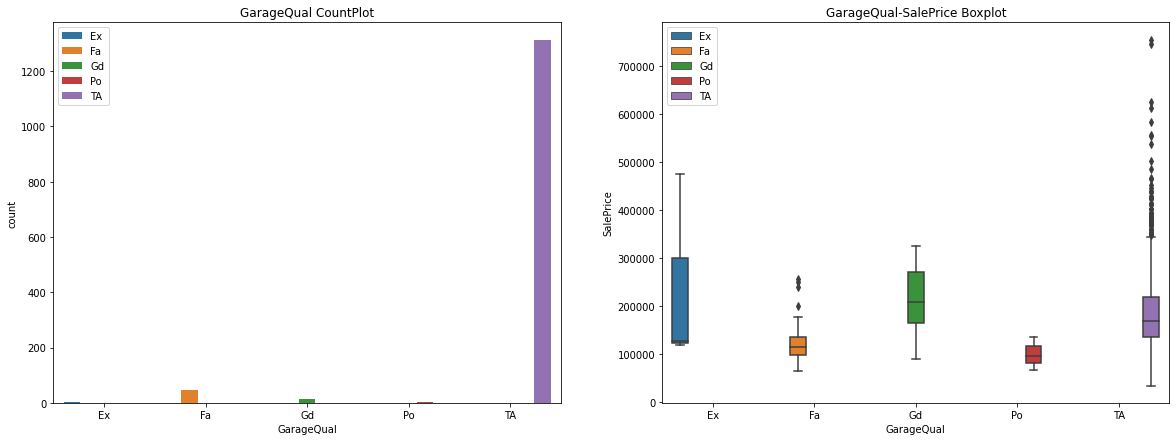

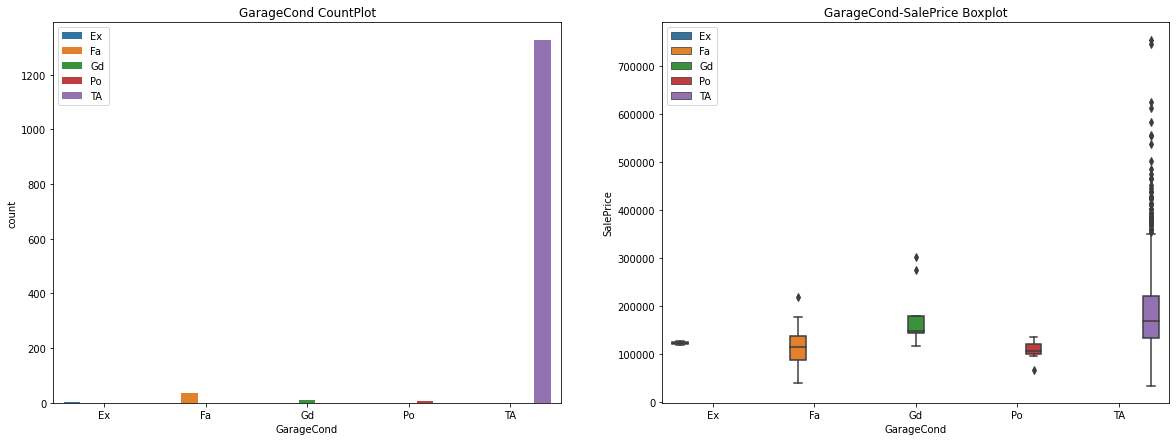

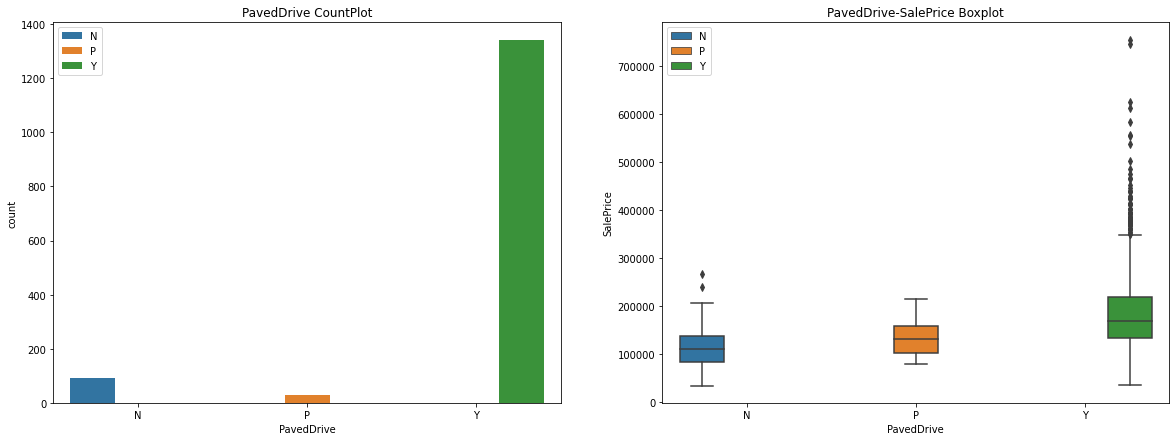

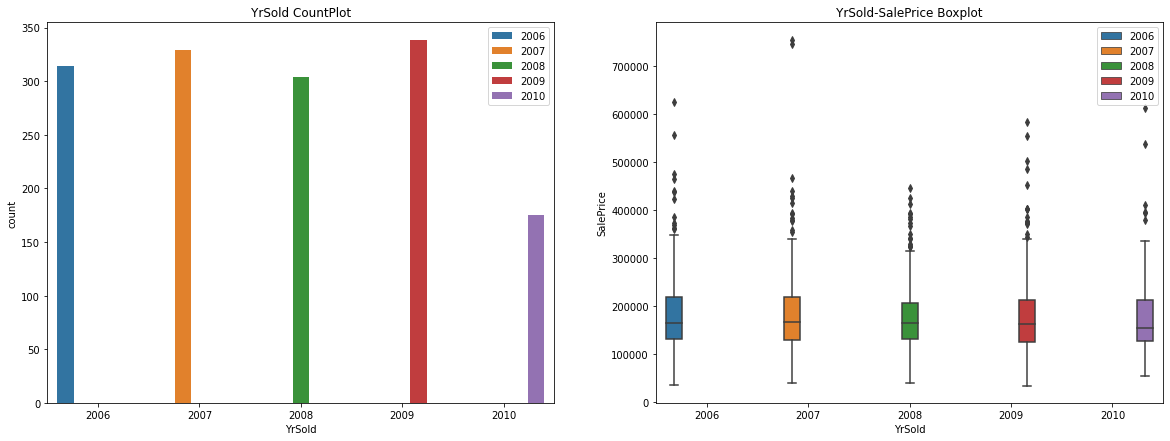

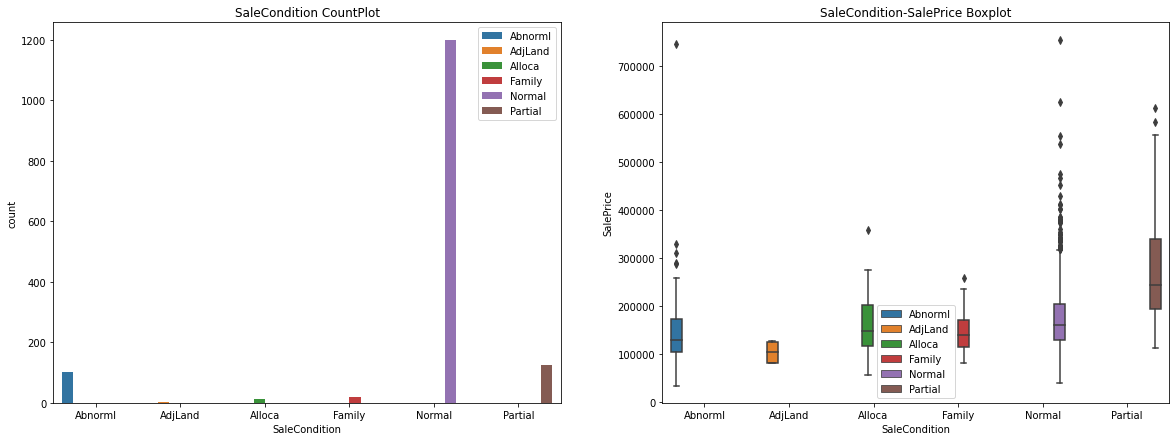

In [8]:
# Understanding categorical variables
for col in categorical_variables:
    col_df=data.dropna(subset=["SalePrice",col])
    plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    plt.title(col+' CountPlot')
    sns.countplot(x=col,hue=col,data=col_df)
    plt.legend(loc="best")
    plt.subplot(1,2,2)
    plt.title(col+'-SalePrice Boxplot')
    sns.boxplot(x=col,y='SalePrice',hue=col,data=col_df)
    plt.legend(loc="best")
    plt.show()

interval columns not set, guessing: ['SalePrice']


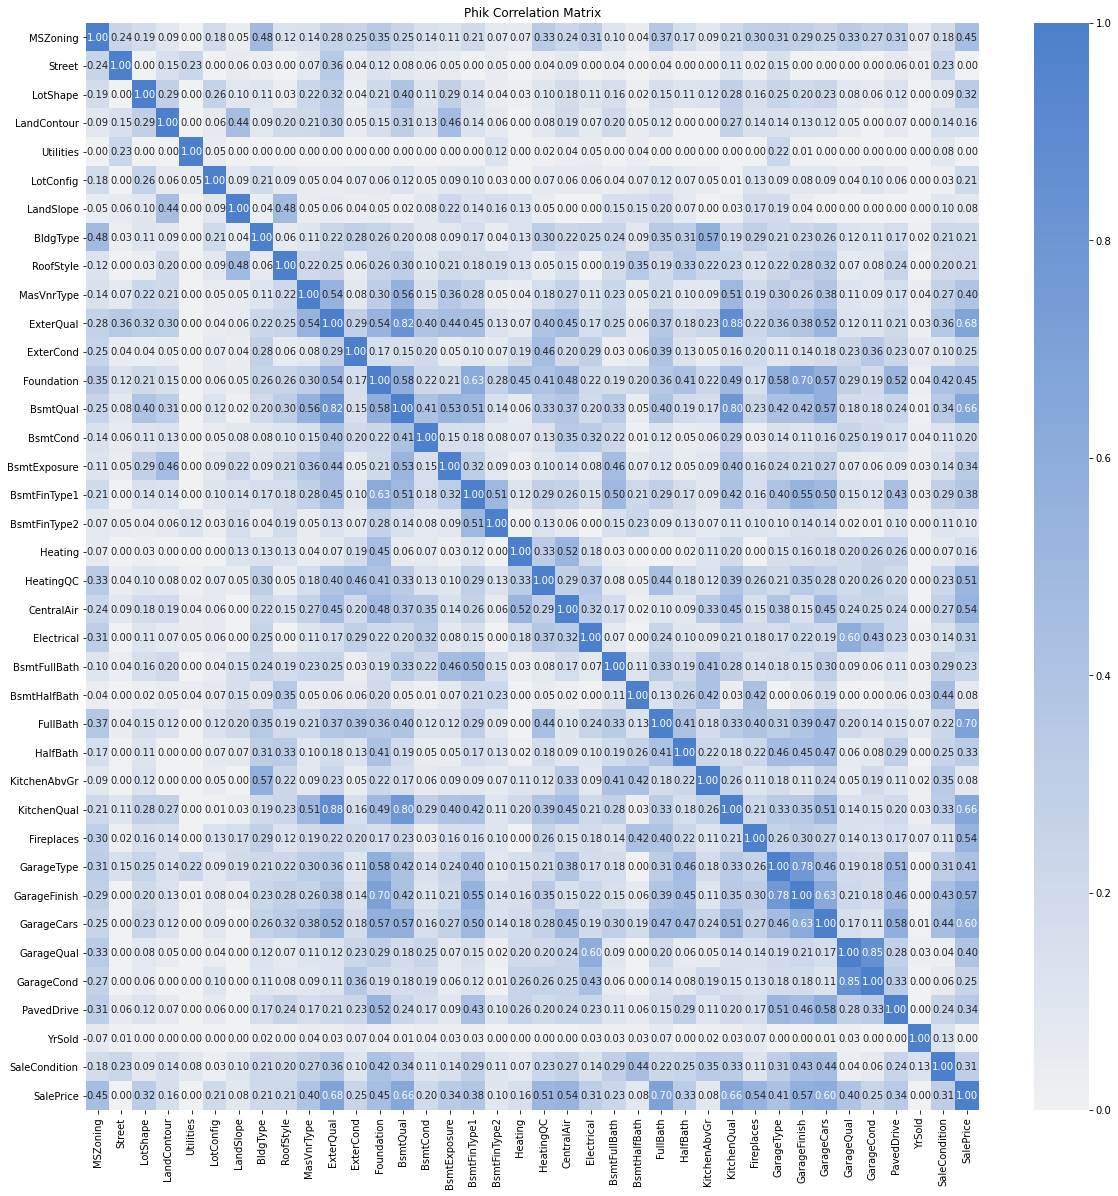

In [9]:
# Phi_k correlation matrix
import phik
res=data[categorical_variables+target_variable].phik_matrix()
plt.figure(figsize=(20,20))
plt.title('Phik Correlation Matrix')
cm = sns.light_palette((0.3,0.5,0.8), as_cmap=True)
sns.heatmap(res,annot=True,fmt=".2f",cmap=cm)
plt.show()

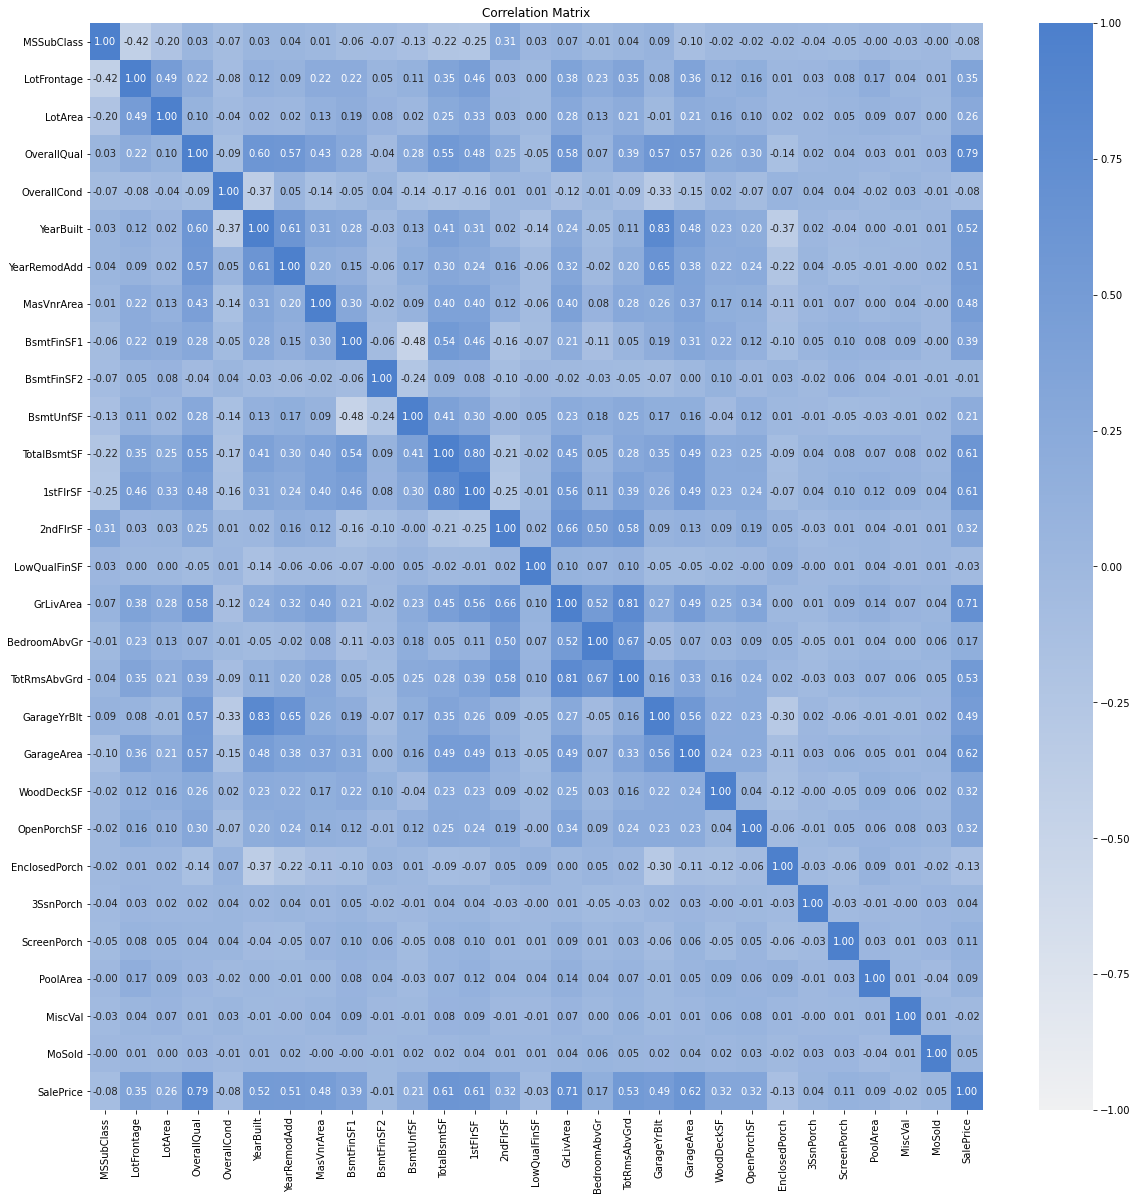

In [10]:
# Correlation matrix for numerical variables
res2=data[num_variables+target_variable].corr()
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix')
cm = sns.light_palette((0.3,0.5,0.8), as_cmap=True)
sns.heatmap(res2,annot=True,fmt=".2f",cmap=cm,vmin=-1,vmax=1)
plt.show()

In [11]:
res=np.abs(res)
res2=np.abs(res2)
sorting=np.argsort(res["SalePrice"].values)[::-1]
print(res["SalePrice"].index[sorting[1:11]])
final_cat=['FullBath','ExterQual','KitchenQual','BsmtQual','GarageCars','GarageFinish','CentralAir','Fireplaces','HeatingQC','Foundation']
sorting=np.argsort(res2["SalePrice"].values)[::-1]
print(res2["SalePrice"].index[sorting[1:11]])
final_num=['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea']

Index(['FullBath', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageCars',
       'GarageFinish', 'CentralAir', 'Fireplaces', 'HeatingQC', 'Foundation'],
      dtype='object')
Index(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt',
       'MasVnrArea'],
      dtype='object')


## Section 3: Managing missing values

From the correlation matrices we have selected the top10 numerical and categorical variables related to SalePrice.

Before applying data transformation we have to handle missing values in these variables.

For the categorical variables we will fill the null values with the majority class.
In numerical variables we will use the average value of the column.

In [12]:
data=data[target_variable+final_cat+final_num]
display(data.head())
data.info()

,SalePrice,FullBath,ExterQual,KitchenQual,BsmtQual,GarageCars,GarageFinish,CentralAir,Fireplaces,HeatingQC,...,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea
0,208500.0,2,Gd,Gd,Gd,2.0,RFn,Y,0,Ex,...,7,1710,548.0,856.0,856,8,2003,2003,2003.0,196.0
1,181500.0,2,TA,TA,Gd,2.0,RFn,Y,1,Ex,...,6,1262,460.0,1262.0,1262,6,1976,1976,1976.0,0.0
2,223500.0,2,Gd,Gd,Gd,2.0,RFn,Y,1,Ex,...,7,1786,608.0,920.0,920,6,2001,2002,2001.0,162.0
3,140000.0,1,TA,Gd,TA,3.0,Unf,Y,1,Gd,...,7,1717,642.0,756.0,961,7,1915,1970,1998.0,0.0
4,250000.0,2,Gd,Gd,Gd,3.0,RFn,Y,1,Ex,...,8,2198,836.0,1145.0,1145,9,2000,2000,2000.0,350.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SalePrice     1460 non-null   float64 
 1   FullBath      2919 non-null   category
 2   ExterQual     2919 non-null   category
 3   KitchenQual   2918 non-null   category
 4   BsmtQual      2838 non-null   category
 5   GarageCars    2918 non-null   category
 6   GarageFinish  2760 non-null   category
 7   CentralAir    2919 non-null   category
 8   Fireplaces    2919 non-null   category
 9   HeatingQC     2919 non-null   category
 10  Foundation    2919 non-null   category
 11  OverallQual   2919 non-null   int64   
 12  GrLivArea     2919 non-null   int64   
 13  GarageArea    2918 non-null   float64 
 14  TotalBsmtSF   2918 non-null   float64 
 15  1stFlrSF      2919 non-null   int64   
 16  TotRmsAbvGrd  2919 non-null   int64   
 17  YearBuilt     2919 non-null   int64   
 18  YearRemo

In [13]:
for col in final_cat:
    if data[col].isnull().sum()>0:
        data[col]=data[col].fillna(data[col].value_counts().index[0])

In [14]:
for col in final_num:
    if data[col].isnull().sum()>0:
        data[col]=data[col].fillna(np.mean(data[col]))

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SalePrice     1460 non-null   float64 
 1   FullBath      2919 non-null   category
 2   ExterQual     2919 non-null   category
 3   KitchenQual   2919 non-null   category
 4   BsmtQual      2919 non-null   category
 5   GarageCars    2919 non-null   category
 6   GarageFinish  2919 non-null   category
 7   CentralAir    2919 non-null   category
 8   Fireplaces    2919 non-null   category
 9   HeatingQC     2919 non-null   category
 10  Foundation    2919 non-null   category
 11  OverallQual   2919 non-null   int64   
 12  GrLivArea     2919 non-null   int64   
 13  GarageArea    2919 non-null   float64 
 14  TotalBsmtSF   2919 non-null   float64 
 15  1stFlrSF      2919 non-null   int64   
 16  TotRmsAbvGrd  2919 non-null   int64   
 17  YearBuilt     2919 non-null   int64   
 18  YearRemo

## Section 4: Data Transformation

Applying encoding to categorical variables and normalizing some numerical variables

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [17]:
le = LabelEncoder()
binary=[]
for col in final_cat:
    if len(data[col].unique())==2:
        binary.append(col)
        data[col]=le.fit_transform(data[col])

In [18]:
for col in final_cat:
    if col not in binary:
        new_cols=pd.get_dummies(data[col])
        new_cols.rename(columns=lambda x: str(col)+' '+str(x), inplace=True)
        data=data.drop([col],axis=1)
        data=pd.concat([data,new_cols], axis=1)

In [19]:
stdscaler=StandardScaler()
data[final_num]=stdscaler.fit_transform(data[final_num])
data.head()

,SalePrice,CentralAir,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,HeatingQC Fa,HeatingQC Gd,HeatingQC Po,HeatingQC TA,Foundation BrkTil,Foundation CBlock,Foundation PConc,Foundation Slab,Foundation Stone,Foundation Wood
0,208500.0,1,0.646183,0.413547,0.348900,-0.444328,-0.773861,0.986849,1.046258,0.896833,...,0,0,0,0,0,0,1,0,0,0
1,181500.0,1,-0.063185,-0.471891,-0.059792,0.477111,0.261075,-0.287758,0.154764,-0.395604,...,0,0,0,0,0,1,0,0,0,0
2,223500.0,1,0.646183,0.563755,0.627553,-0.299076,-0.610718,-0.287758,0.980221,0.848965,...,0,0,0,0,0,0,1,0,0,0
3,140000.0,1,0.646183,0.427382,0.785457,-0.671283,-0.506205,0.349546,-1.859351,-0.682812,...,0,1,0,0,1,0,0,0,0,0
4,250000.0,1,1.355551,1.378042,1.686437,0.211573,-0.037170,1.624153,0.947203,0.753229,...,0,0,0,0,0,0,1,0,0,0


In [20]:
final_train=data[0:len(train)]
final_test=data[len(train):len(data)]

In [21]:
final_train.to_csv('data/final_train.csv', index=False)
final_test.to_csv('data/final_test.csv', index=False)